In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


# Read DataFrame from pickle file
data = pd.read_pickle('dataset.pickle')
data = data.drop(columns=['date','TL_BASED_ISE'])
data

,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,MACD Line,Signal Line,Buy/Hold/Sell
0,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,0.000000,0.000000,Hold
1,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,-0.000232,-0.000129,Sell
2,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,-0.001979,-0.000887,Sell
3,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,-0.003929,-0.001917,Sell
4,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,-0.002038,-0.001953,Sell
...,...,...,...,...,...,...,...,...,...,...
531,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039,0.001088,0.000373,Buy
532,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039,0.001662,0.000630,Buy
533,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938,0.001366,0.000778,Buy
534,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958,0.000061,0.000634,Sell


Intercept : 0.07204179635242573
EU : -0.9433514937374502
EM : -0.7554415046951465
FTSE : -0.8705295428696376
NIKKEI : -0.908020119777165
DAX : -0.9238090391239709
SP : -0.712940882089748
BOVESPA : -0.6838514523013457


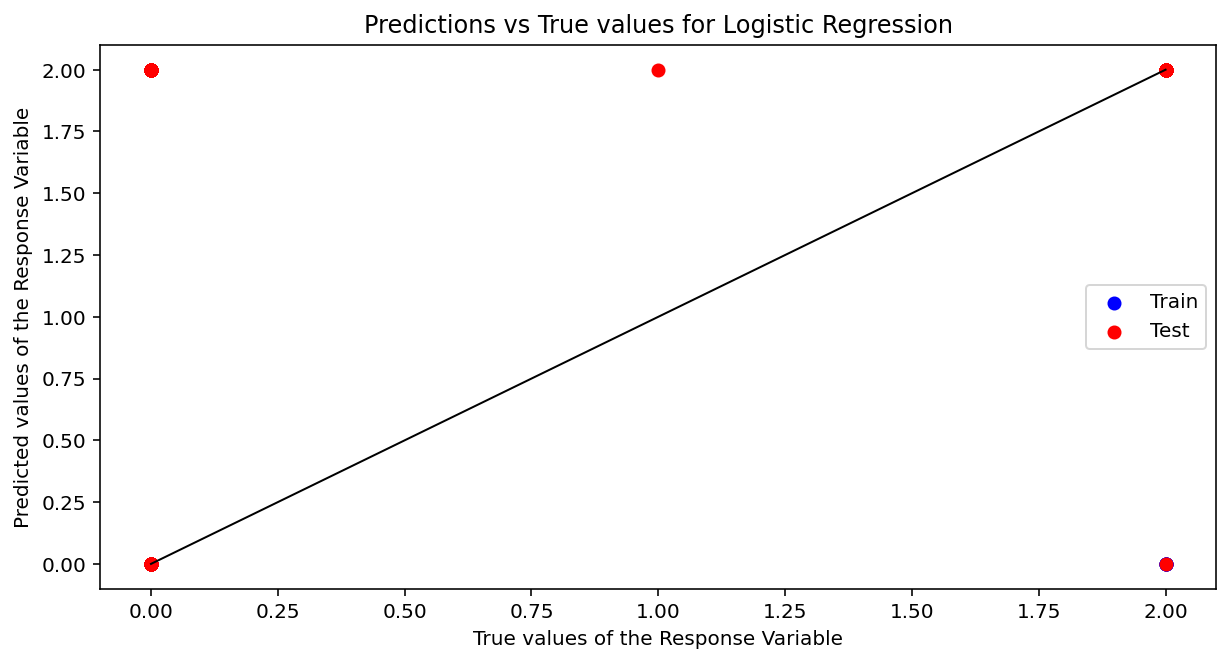

Train Accuracy: 0.5895522388059702
Test Accuracy: 0.5970149253731343

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.87      0.18      0.29       194
           2       0.56      0.98      0.71       208

    accuracy                           0.59       402
   macro avg       0.72      0.58      0.50       402
weighted avg       0.71      0.59      0.51       402

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      0.21      0.35        66
           1       0.00      0.00      0.00         1
           2       0.55      0.99      0.71        67

    accuracy                           0.60       134
   macro avg       0.50      0.40      0.35       134
weighted avg       0.74      0.60      0.53       134



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


NameError: name 'sns' is not defined

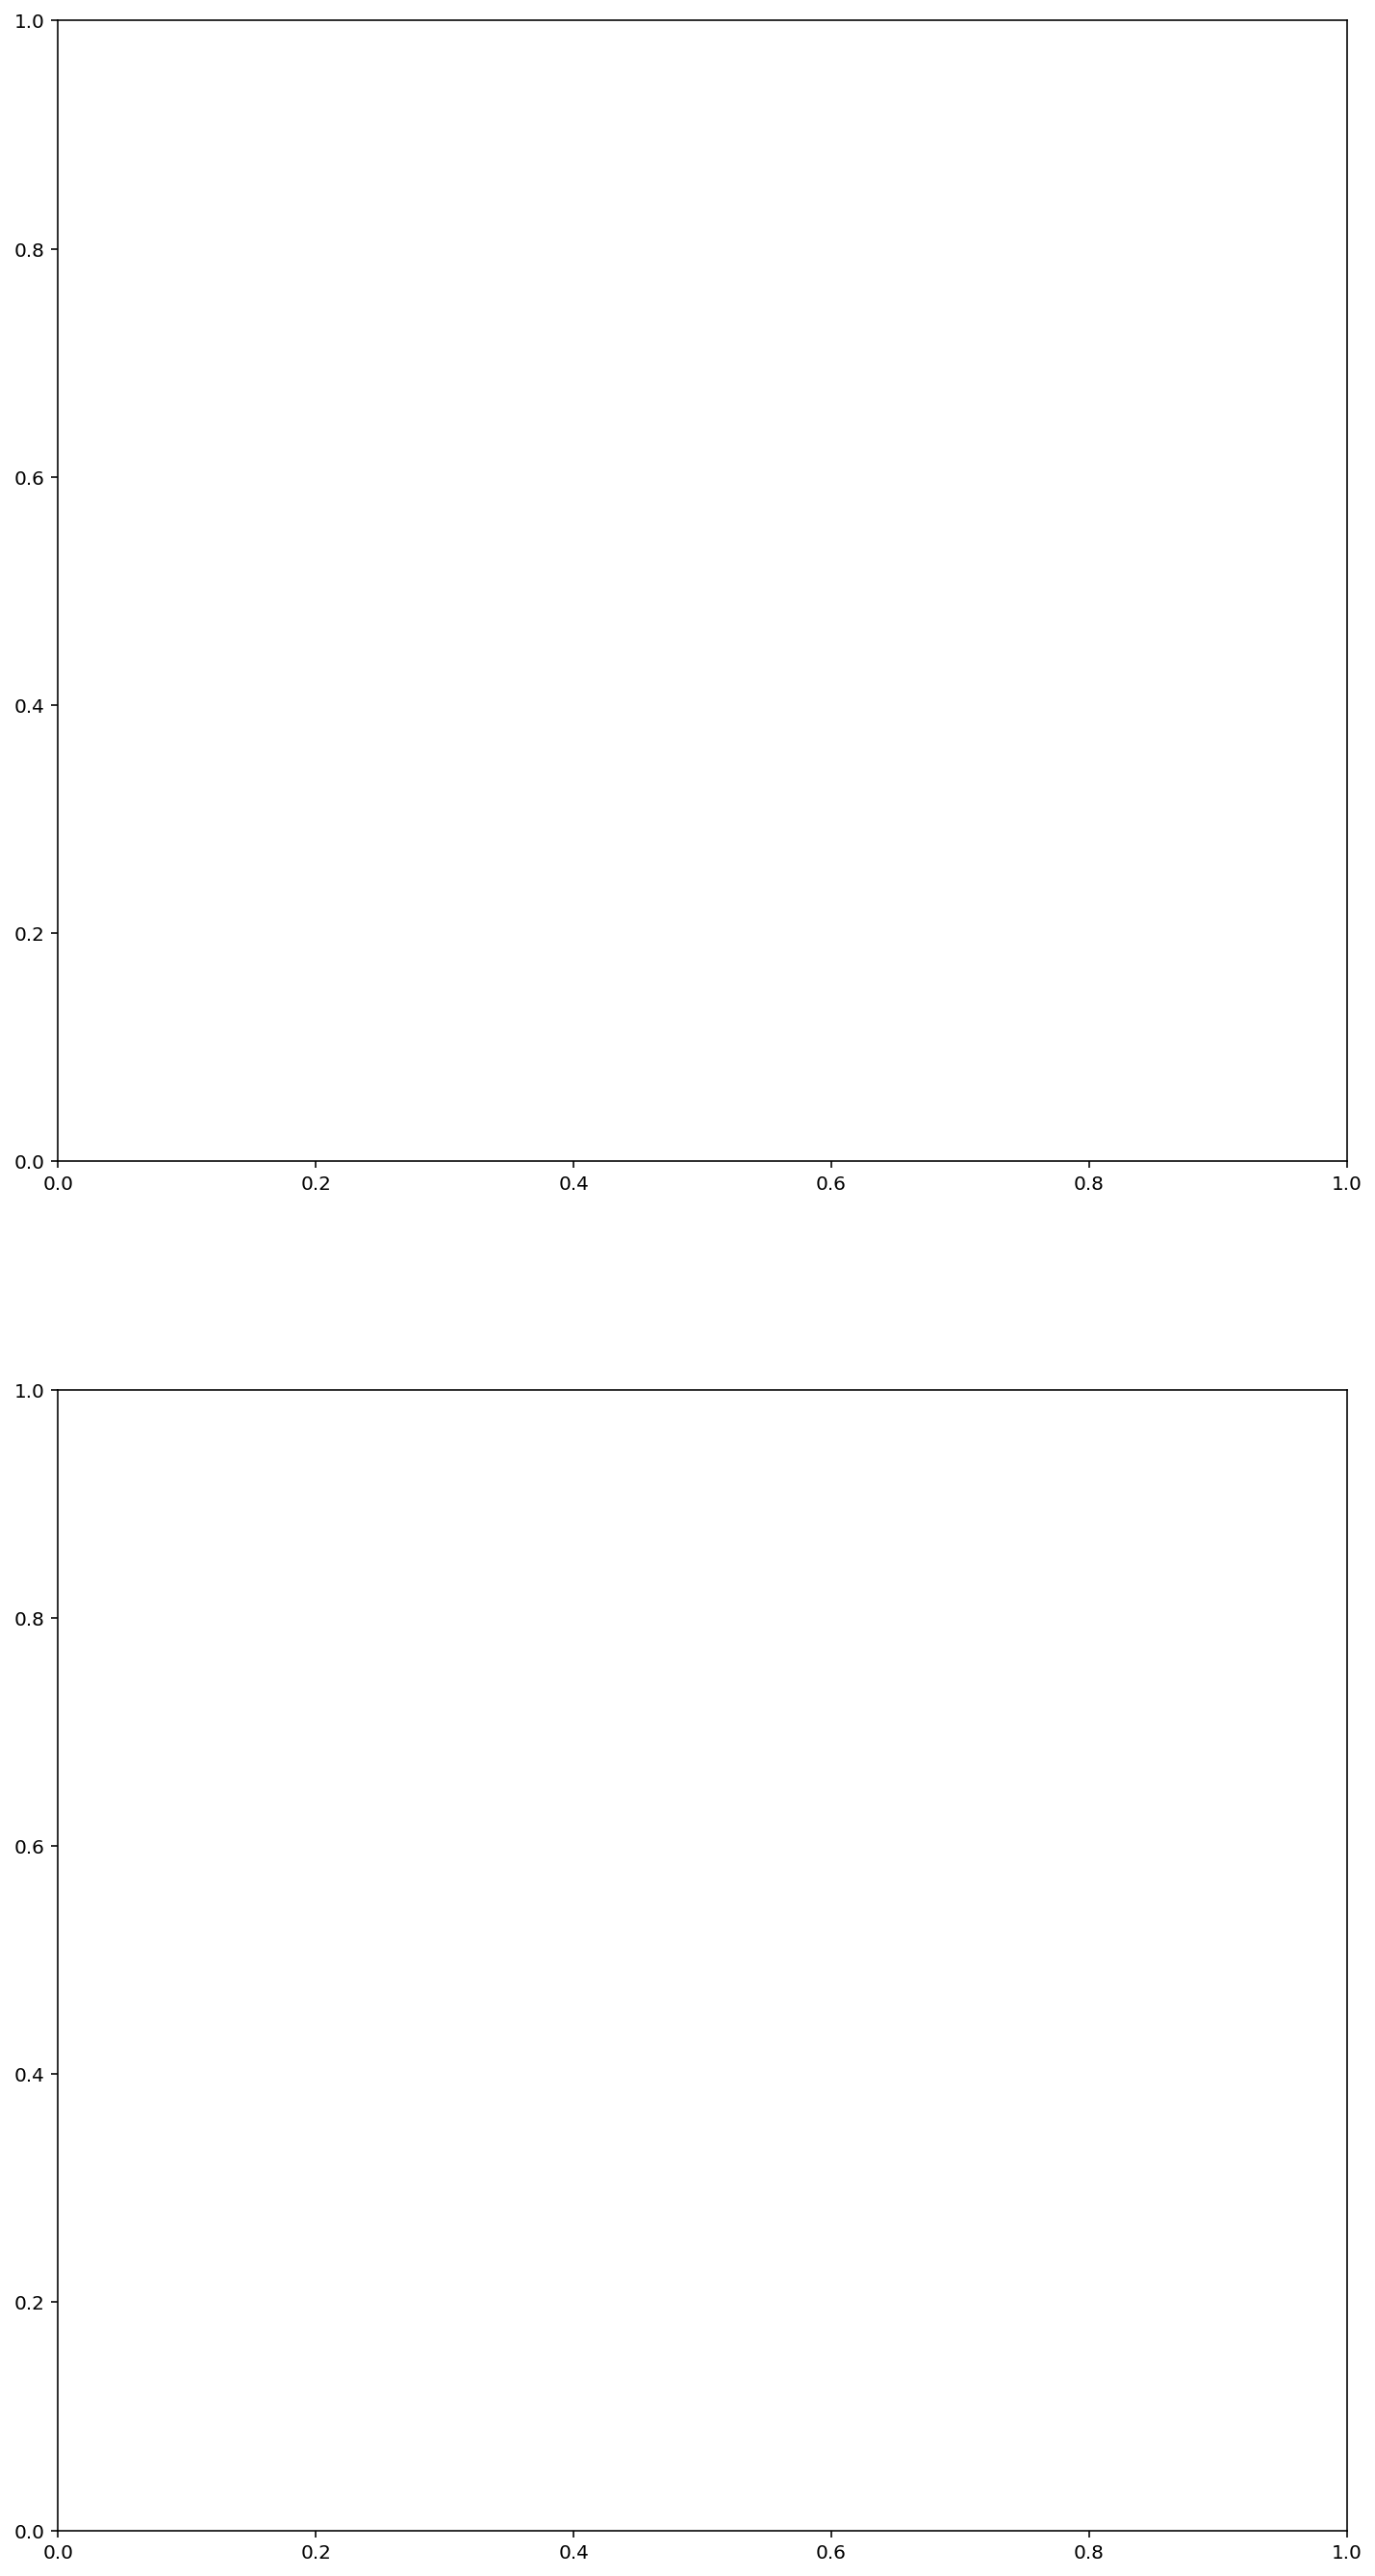

In [4]:
# Assuming 'data' is your DataFrame and 'predictors' are the features to be used
predictors = ['EU', 'EM', 'FTSE', 'NIKKEI', 'DAX', 'SP', 'BOVESPA']

# Encode the 'Buy/Hold/Sell' column into binary labels (0 for 'Sell', 1 for 'Buy')
label_encoder = LabelEncoder()
data['Buy/Hold/Sell_encoded'] = label_encoder.fit_transform(data['Buy/Hold/Sell'])

# Select the encoded target variable and predictors
X = data[predictors]
y = data['Buy/Hold/Sell_encoded']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get the coefficients with their respective predictor names
coefficients_with_names = zip(['Intercept'] + predictors, [logreg.intercept_[0]] + list(logreg.coef_[0]))

# Print coefficients with names
for predictor, coefficient in coefficients_with_names:
    print(predictor, ":", coefficient)

# Predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Plotting Predictions vs True values
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         color='black', linestyle='-', linewidth=1)  # Diagonal line
plt.xlabel("True values of the Response Variable")
plt.ylabel("Predicted values of the Response Variable")
plt.title("Predictions vs True values for Logistic Regression")
plt.legend()
plt.show()

# Model Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
            annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Calculate True Positive Rate and False Positive Rate
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

tpr_train = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[1, 0])
fpr_train = conf_matrix_train[0, 1] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])

tpr_test = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[1, 0])
fpr_test = conf_matrix_test[0, 1] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])

print("True Positive Rate (TPR) Train:", tpr_train)
print("False Positive Rate (FPR) Train:", fpr_train)
print()
print("True Positive Rate (TPR) Test:", tpr_test)
print("False Positive Rate (FPR) Test:", fpr_test)


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Assuming your dataset is named 'data' and 'predictors' are the features to be used
predictors = ['EU', 'EM', 'FTSE', 'NIKKEI', 'DAX', 'SP', 'BOVESPA','MACD Line','Signal Line']

# Extract Response and Predictors
X = data[predictors]
y = data['Buy/Hold/Sell']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=100, max_depth=4)

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

# Calculate overall classification accuracy
overall_accuracy = rforest.score(X_test, y_test)
print("Overall Classification Accuracy:", overall_accuracy)



Overall Classification Accuracy: 0.8385093167701864


Train Data
Accuracy  :	 0.92

TPR Train :	 0.9444444444444444
TNR Train :	 0.8926553672316384

FPR Train :	 0.10734463276836158
FNR Train :	 0.05555555555555555


<Axes: >

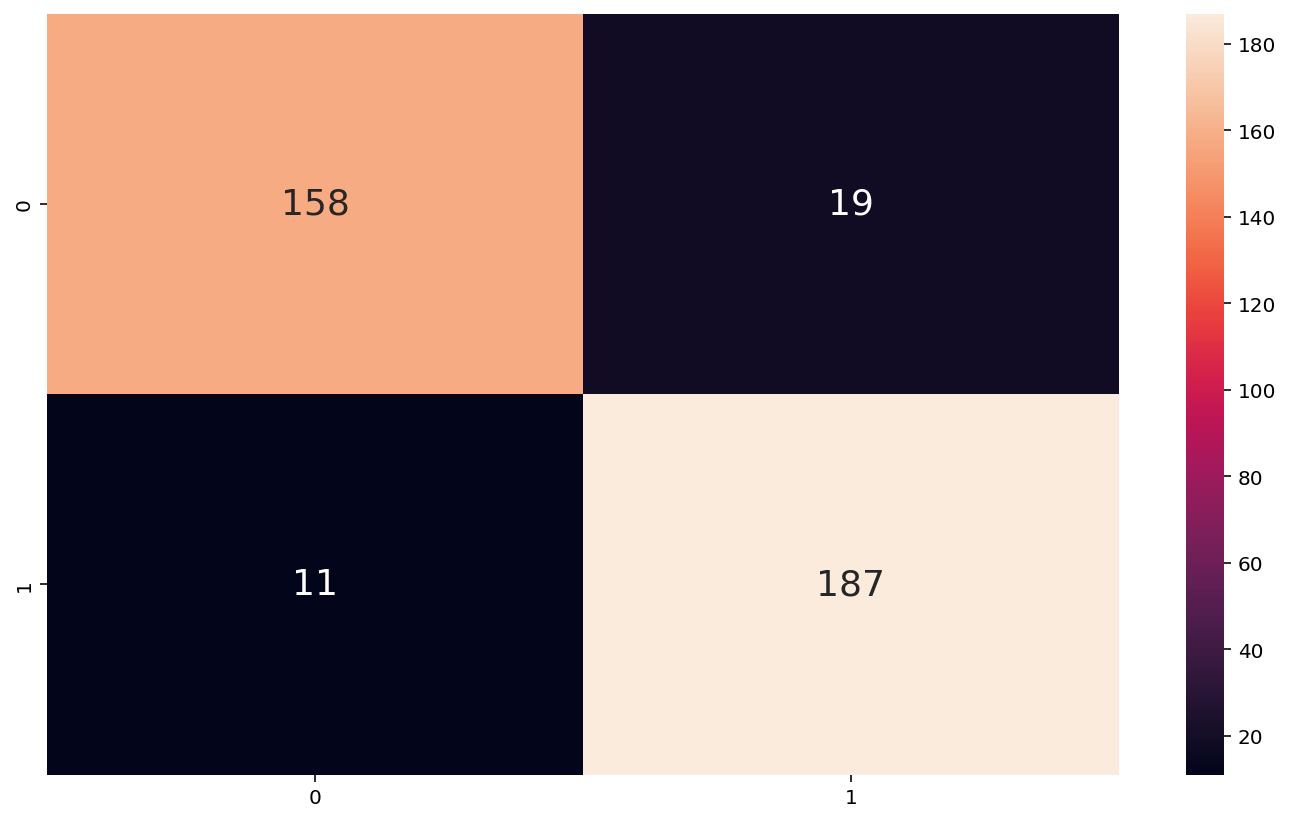

In [27]:
# Predict the Response corresponding to Predictors for Train Data
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy for Train Data
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix for Train Data
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]  # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1]  # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0]  # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0]  # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain / (tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain / (tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain / (tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain / (tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix for Train Data
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot=True, fmt=".0f", annot_kws={"size": 18})


Variable Importance:
       Feature  Importance
7    MACD Line    0.432409
8  Signal Line    0.113358
1           EM    0.096020
2         FTSE    0.090351
0           EU    0.088212
3       NIKKEI    0.057615
5           SP    0.052281
4          DAX    0.042610
6      BOVESPA    0.027145


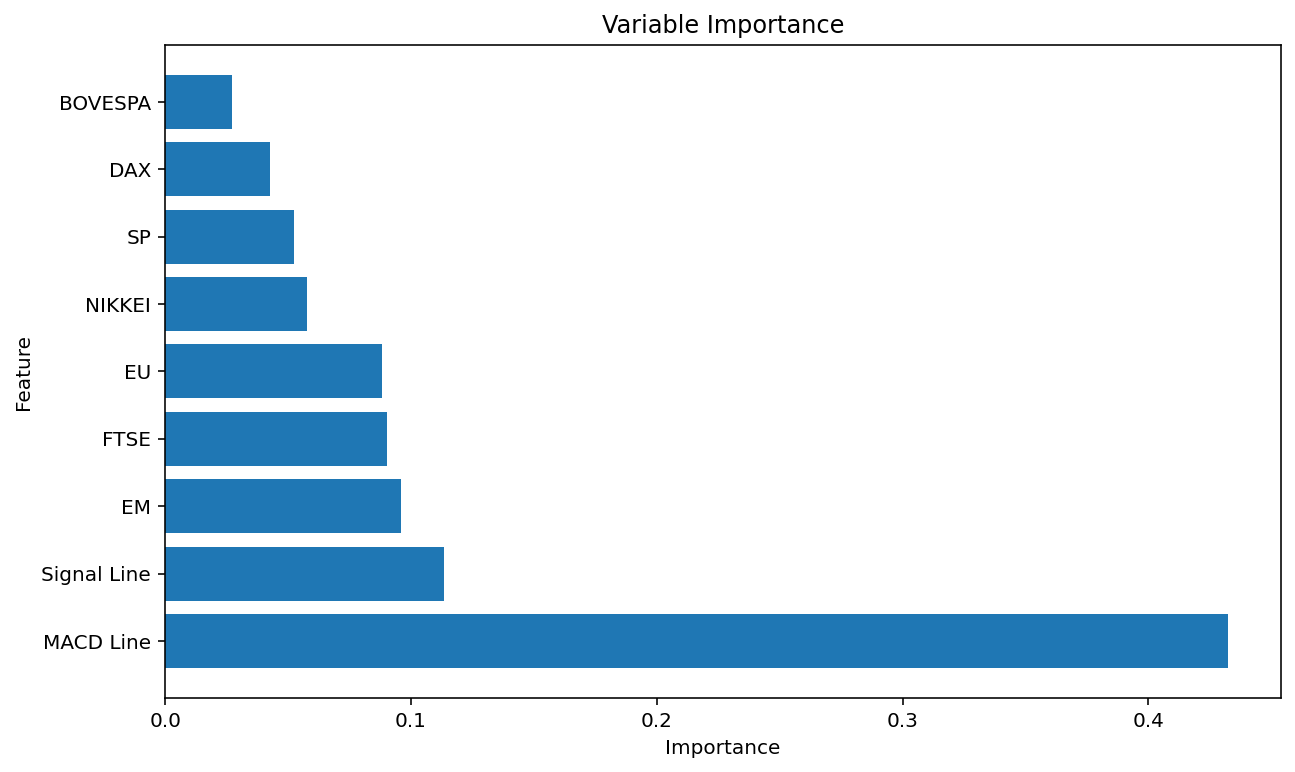

In [28]:
# Get feature importances from the trained Random Forest model
feature_importances = rforest.feature_importances_

# Create a DataFrame to store feature importances along with feature names
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display Variable Importance
print("Variable Importance:")
print(feature_importance_df)

# Plot the variable importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Variable Importance")
plt.show()


In [29]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

#Since you mentioned having a dataset with a specific target variable (Buy/Hold/Sell), check the class distribution to see if there is imbalance. If one class dominates the others, techniques like oversampling (e.g., SMOTE) for minority classes or undersampling for majority classes can help balance the dataset.

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define and train the Random Forest Classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from grid search
best_rf_classifier = grid_search.best_estimator_

# Evaluate the model on test data
y_test_pred = best_rf_classifier.predict(X_test)

# Print classification report for detailed metrics
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         Buy       0.87      0.86      0.86        83
        Hold       0.00      0.00      0.00         1
        Sell       0.84      0.86      0.85        77

    accuracy                           0.85       161
   macro avg       0.57      0.57      0.57       161
weighted avg       0.85      0.85      0.85       161



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7512437810945274

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6417910447761194



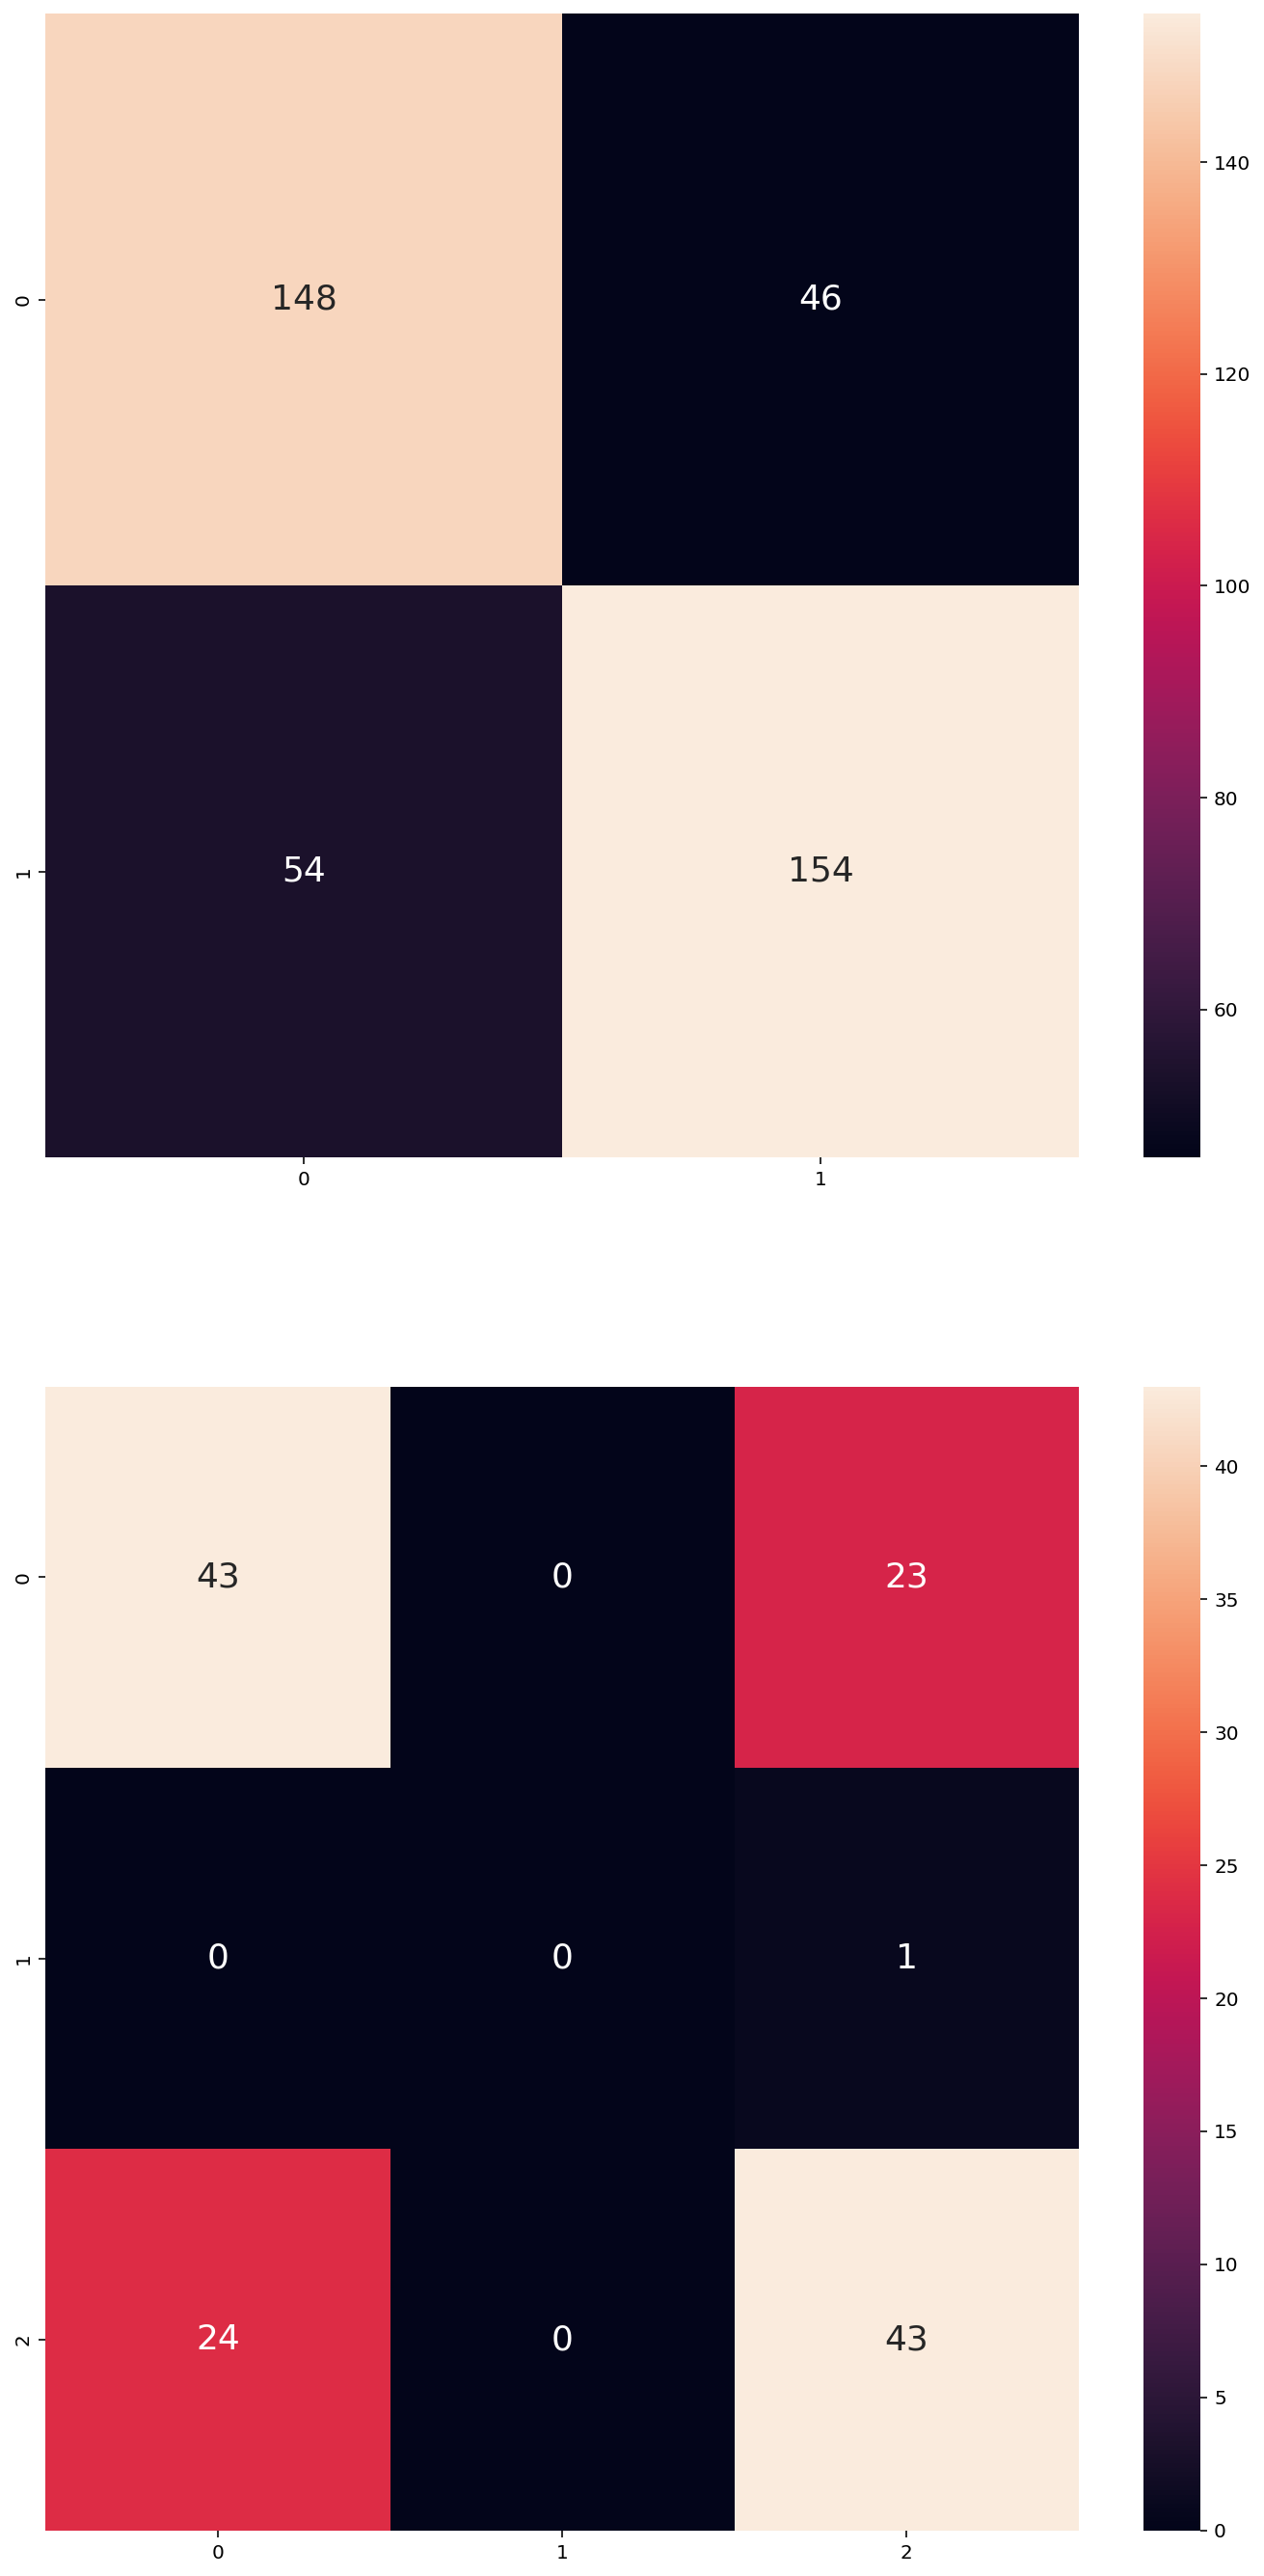

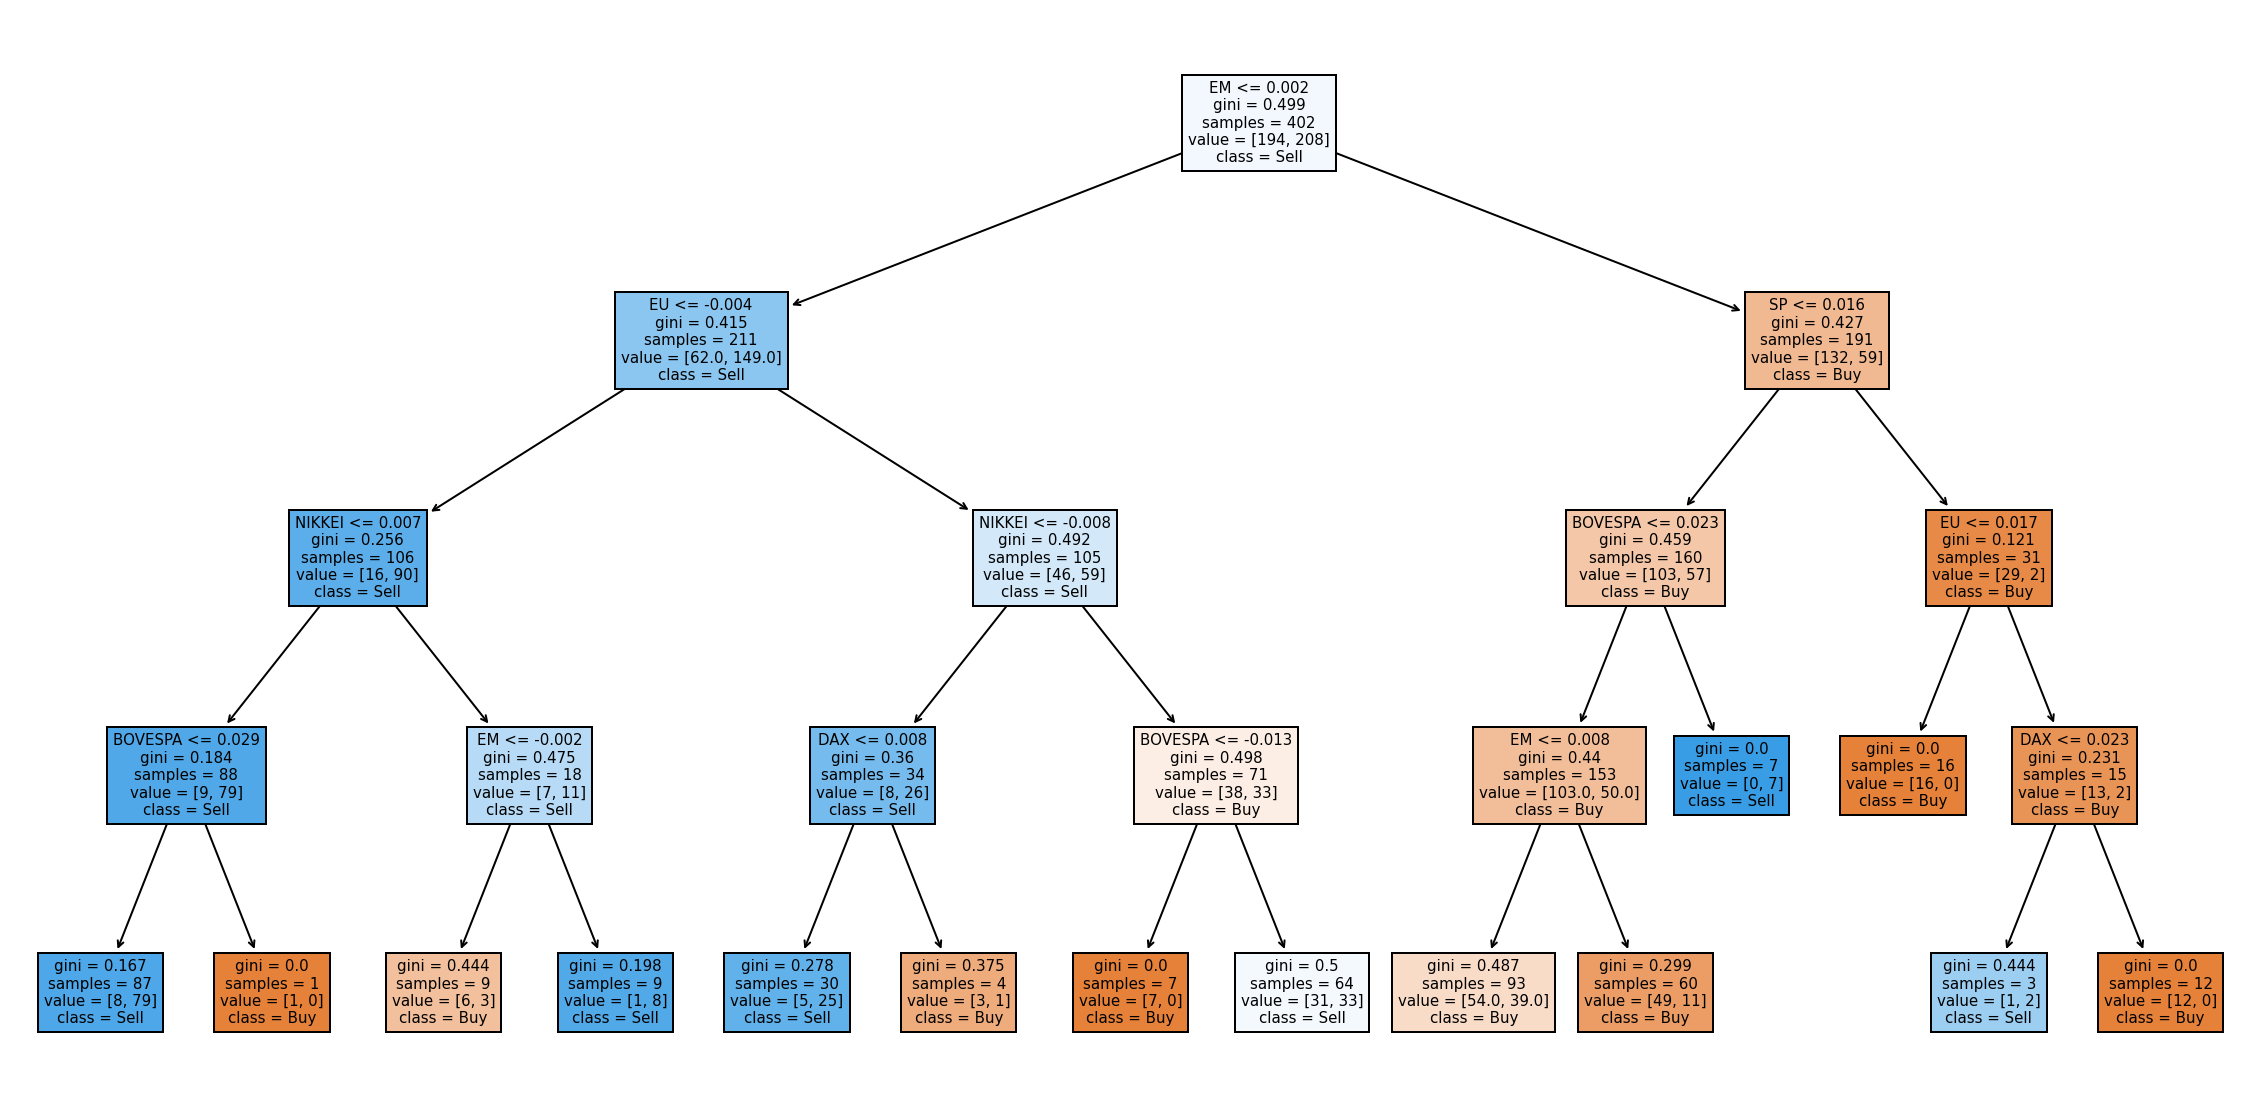

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

# Assuming your dataset is named 'data'
label_encoder = LabelEncoder()
data['Buy/Hold/Sell_encoded'] = label_encoder.fit_transform(data['Buy/Hold/Sell'])

# Extract Response and Predictors
y = data['Buy/Hold/Sell_encoded']
X = data[predictors]

# Assuming your dataset is named 'data' and 'predictors' are the features to be used
predictors = ['EU', 'EM', 'FTSE', 'NIKKEI', 'DAX', 'SP', 'BOVESPA']

# Extract Response and Predictors
y = pd.DataFrame(data['Buy/Hold/Sell'].astype('category'))
X = pd.DataFrame(data[predictors])

# Split the Dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=4, random_state=42)  # create the decision tree object
dectree.fit(X_train, y_train)  # train the decision tree model


# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
            annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dectree, filled=True, feature_names=X.columns, class_names=dectree.classes_)
plt.show()

# Show the plots
plt.show()


Train Data
Accuracy  :	 0.7512437810945274

TPR Train :	 0.7403846153846154
TNR Train :	 0.7628865979381443

FPR Train :	 0.23711340206185566
FNR Train :	 0.25961538461538464
Test Data
Accuracy  :	 0.6417910447761194

TPR Test :	 nan
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 nan


/tmp/ipykernel_1224/2351830955.py:44: RuntimeWarning: invalid value encountered in long_scalars
  print("TPR Test :\t", (tpTest / (tpTest + fnTest)))
/tmp/ipykernel_1224/2351830955.py:49: RuntimeWarning: invalid value encountered in long_scalars
  print("FNR Test :\t", (fnTest / (fnTest + tpTest)))


<Axes: >

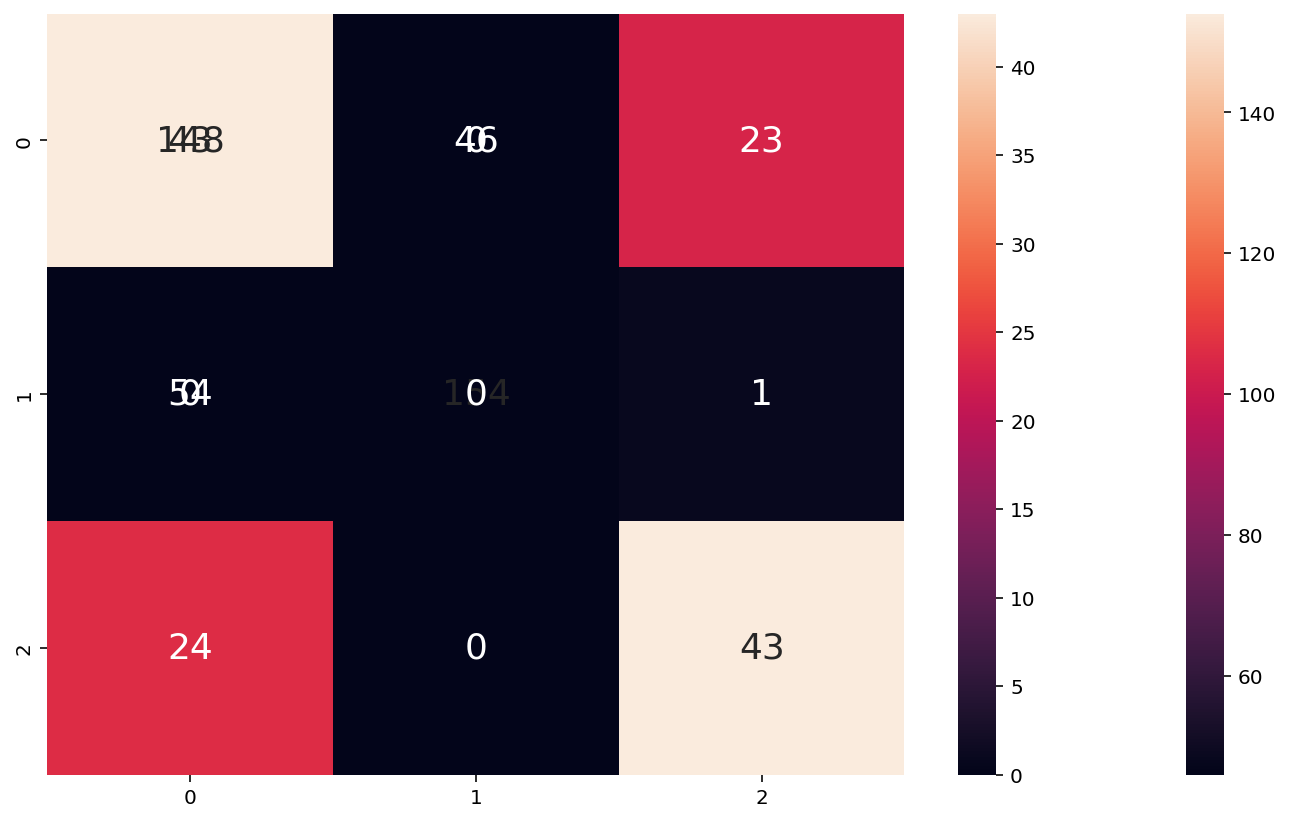

In [31]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1]  # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1]  # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0]  # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0]  # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain / (tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain / (tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain / (tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain / (tpTrain + fnTrain)))


# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18})


# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1]  # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1]  # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0]  # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0]  # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest / (tpTest + fnTest)))
print("TNR Test :\t", (tnTest / (tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest / (fpTest + tnTest)))
print("FNR Test :\t", (fnTest / (fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18})


OUTLIER REMOVAL SECTION FOR DATASET

95

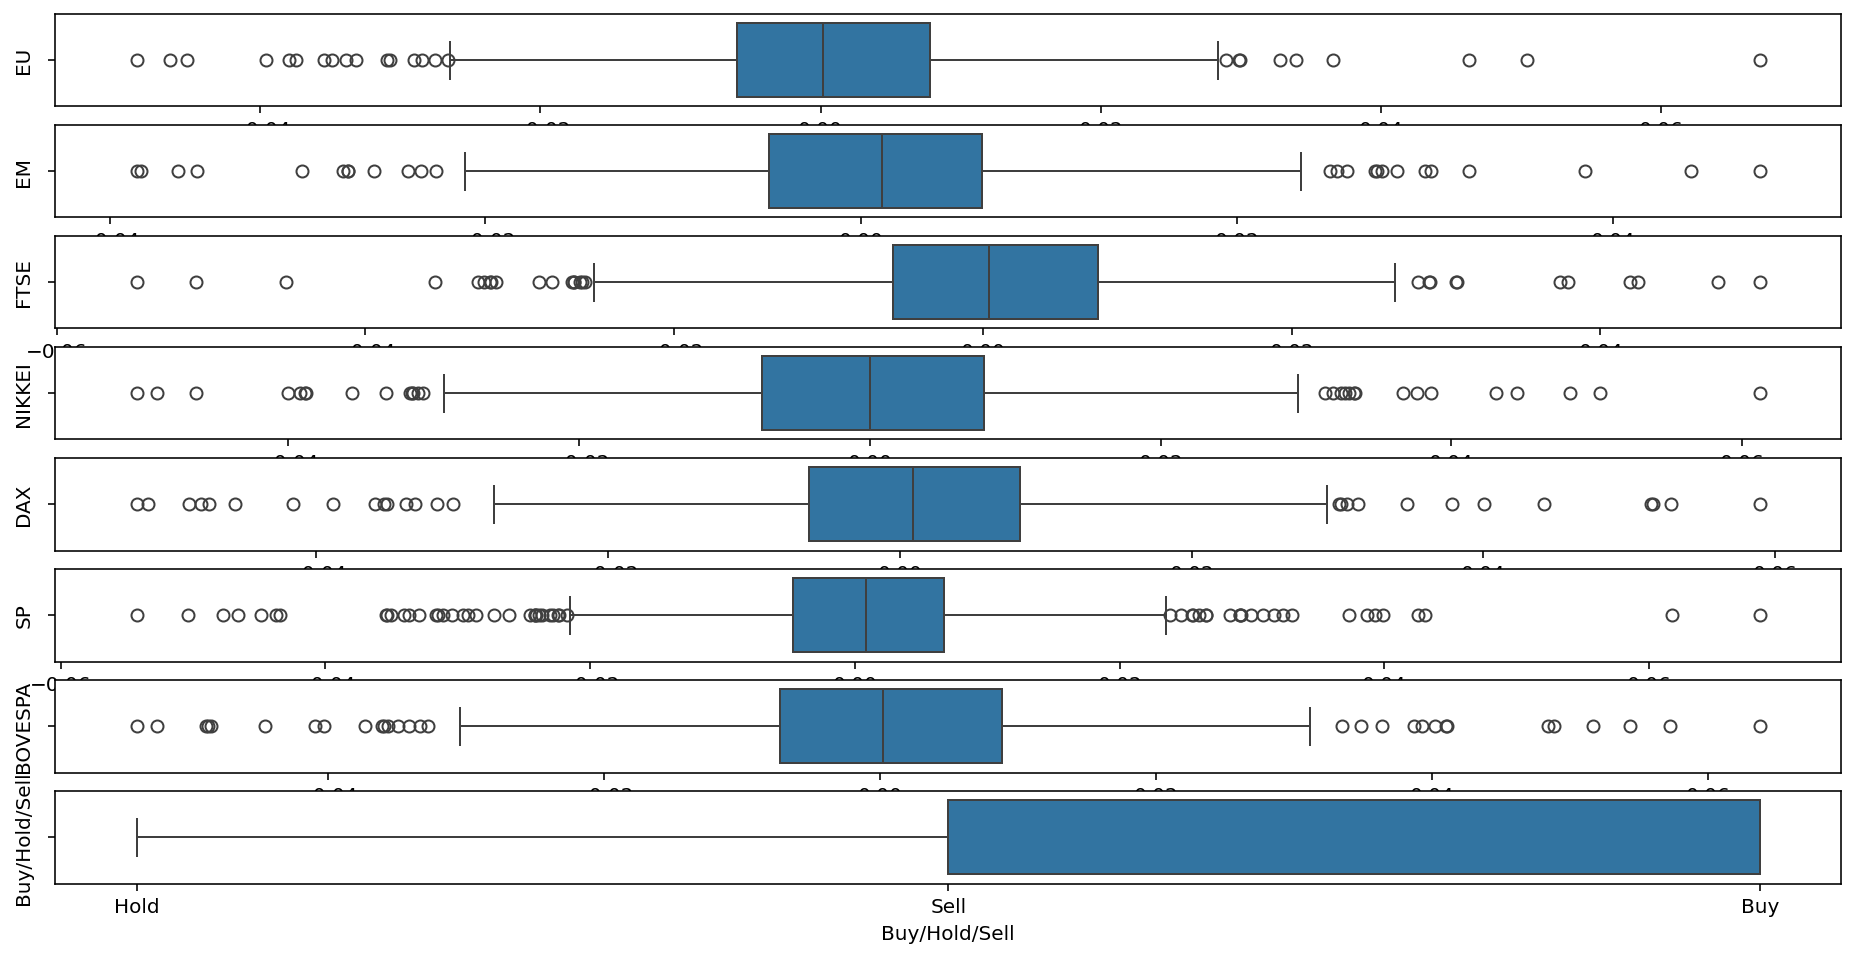

In [6]:
# Assuming 'data' is your original DataFrame and 'predictors' are the stock predictors
predictors = ["EU", "EM", "FTSE", "NIKKEI", "DAX", "SP", "BOVESPA"]

# Select the columns corresponding to the predictors
cleanData = data[predictors + ['Buy/Hold/Sell']].copy()

# Visualize boxplots to identify outliers
f, axes = plt.subplots(len(predictors) + 1, 1, figsize=(16, 8))
for i, predictor in enumerate(predictors):
    sb.boxplot(data=cleanData[predictor], orient="h", ax=axes[i])
    axes[i].set_ylabel(predictor)

# Boxplot for 'Buy/Hold/Sell'
sb.boxplot(data=cleanData['Buy/Hold/Sell'], orient="h", ax=axes[len(predictors)])
axes[len(predictors)].set_ylabel('Buy/Hold/Sell')

# Calculate quartiles for each predictor
Q1 = cleanData[predictors].quantile(0.25)
Q3 = cleanData[predictors].quantile(0.75)

# Calculate the interquartile range (IQR) for each predictor
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection for each predictor
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each predictor using the rule
rule = ((cleanData[predictors] < lower_bound) | (cleanData[predictors] > upper_bound)).any(axis=1)

# Count the number of outliers removed
rule.sum()

In [7]:
# Calculate the quartiles for each predictor
Q1 = cleanData[predictors].quantile(0.25)
Q3 = cleanData[predictors].quantile(0.75)

# Calculate the interquartile range (IQR) for each predictor
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection for each predictor
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each predictor using the rule
rule = ((cleanData[predictors] < lower_bound) | (cleanData[predictors] > upper_bound))

# Check the dataframe rule
print(rule)


        EU     EM   FTSE  NIKKEI    DAX     SP  BOVESPA
0    False   True  False   False  False  False    False
1    False  False  False   False  False  False    False
2    False  False   True   False  False   True     True
3    False  False  False    True  False  False    False
4    False  False  False   False  False  False    False
..     ...    ...    ...     ...    ...    ...      ...
531  False  False  False   False  False  False    False
532  False  False  False   False  False  False    False
533  False  False  False   False  False  False    False
534  False  False  False   False  False  False    False
535  False  False  False   False  False  False    False

[536 rows x 7 columns]


In [8]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column
print(outliers)

0       True
1      False
2       True
3       True
4      False
       ...  
531    False
532    False
533    False
534    False
535    False
Length: 536, dtype: bool


In [9]:
# How many points are outliers for the two variables combined?
outliers.value_counts()

False    441
True      95
Name: count, dtype: int64

In [10]:
# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices

Index([  0,   2,   3,   5,   7,   8,  10,  11,  12,  14,  15,  16,  17,  18,
        19,  24,  26,  27,  30,  31,  34,  35,  36,  39,  40,  41,  42,  43,
        44,  46,  47,  48,  49,  50,  51,  54,  55,  56,  60,  61,  63,  66,
        68,  75,  78,  81,  83,  87,  88,  90,  93,  94,  95,  97, 102, 104,
       112, 117, 120, 125, 132, 134, 157, 162, 168, 188, 207, 229, 264, 273,
       274, 330, 334, 335, 337, 338, 339, 343, 345, 346, 347, 349, 351, 355,
       356, 357, 358, 361, 374, 379, 380, 387, 405, 419, 425],
      dtype='int64')

RANDOM FOREST WITHOUT OUTLIERS MODEL WITH INCREASE NUMBER OF TREES + OUTLIER REMOVAL

In [37]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Assuming 'cleanData' contains the predictors and target variable
# Split the Dataset into Features (X) and Target Response (y)
X = cleanData.drop(columns=['Buy/Hold/Sell'])  # Features
y = cleanData['Buy/Hold/Sell']  # Target Response

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=1000,  # n_estimators denote number of trees
                                 max_depth=4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)




RandomForestClassifier(max_depth=4, n_estimators=1000)

Variable Importance:
   Feature  Importance
0       EU    0.197188
2     FTSE    0.177133
1       EM    0.176128
4      DAX    0.144069
3   NIKKEI    0.132359
5       SP    0.088962
6  BOVESPA    0.084160


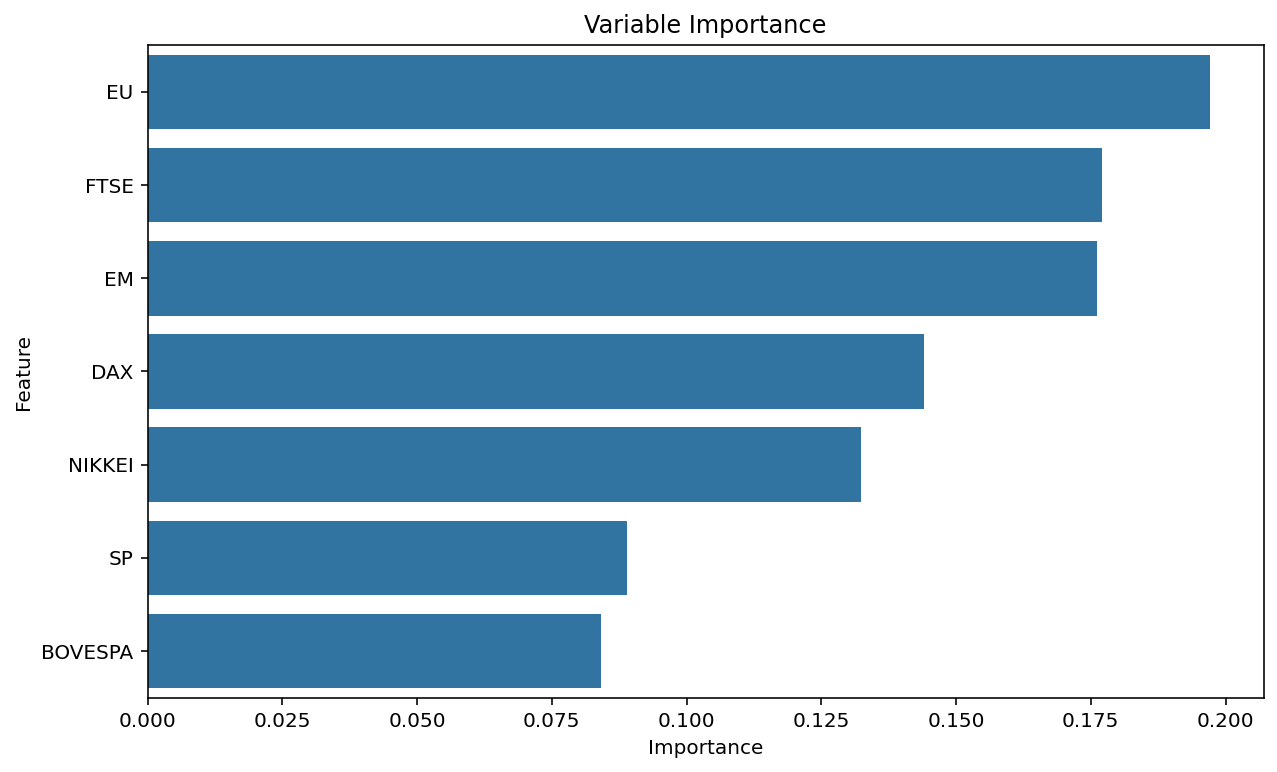

AUC: 0.28089887640449446
Overall Classification Accuracy: 0.7267080745341615


In [38]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Assuming 'cleanData' contains the predictors and target variable
# Split the Dataset into Features (X) and Target Response (y)
X = cleanData.drop(columns=['Buy/Hold/Sell'])  # Features
y = cleanData['Buy/Hold/Sell']  # Target Response

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=1000,  # n_estimators denote number of trees
                                 max_depth=4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

# Calculate Variable Importance
importance = rforest.feature_importances_
variable_importance = pd.DataFrame({"Feature": X.columns, "Importance": importance})
variable_importance = variable_importance.sort_values(by="Importance", ascending=False)

# Display Variable Importance
print("Variable Importance:")
print(variable_importance)

# Plot Variable Importance
plt.figure(figsize=(10, 6))
sb.barplot(x="Importance", y="Feature", data=variable_importance)
plt.title("Variable Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# Assuming 'cleanData' contains the predictors and target variable
# Split the Dataset into Features (X) and Target Response (y)
X = cleanData.drop(columns=['Buy/Hold/Sell'])  # Features
y = cleanData['Buy/Hold/Sell']  # Target Response

# Split the Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators=1000,  # n_estimators denote number of trees
                                 max_depth=4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

# Predict probabilities for the positive class (Buy/Hold/Sell = 1)
y_proba = rforest.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_proba)

# Display AUC
print("AUC:", auc)

# Calculate overall classification accuracy
overall_accuracy = rforest.score(X_test, y_test)
print("Overall Classification Accuracy:", overall_accuracy
     )

Train Data
Accuracy  :	 0.7733333333333333

TPR Train :	 0.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 1.0


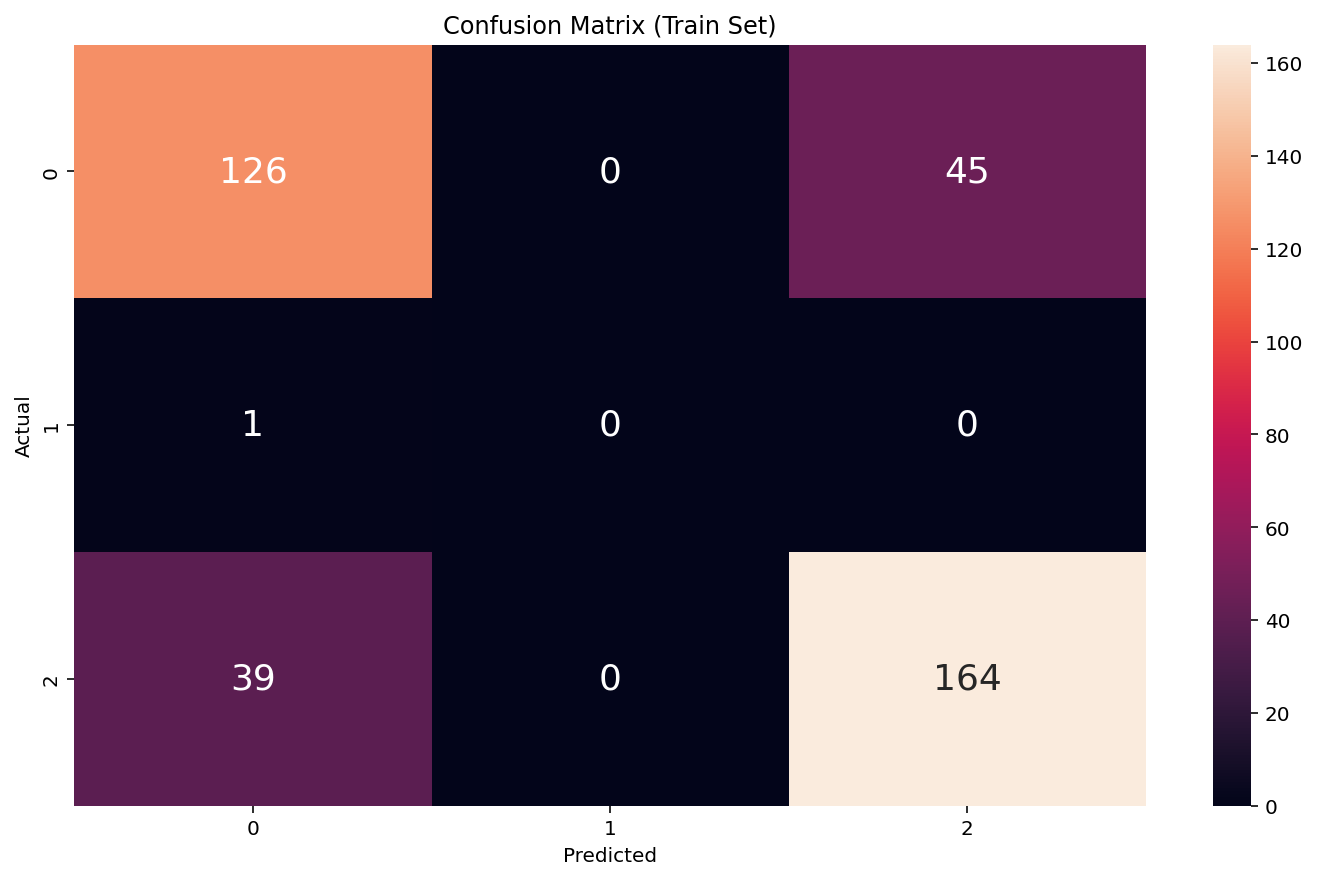

In [39]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(cmTrain, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Train Set)')
plt.show()


Improved decision tree model 



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7512437810945274

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6417910447761194



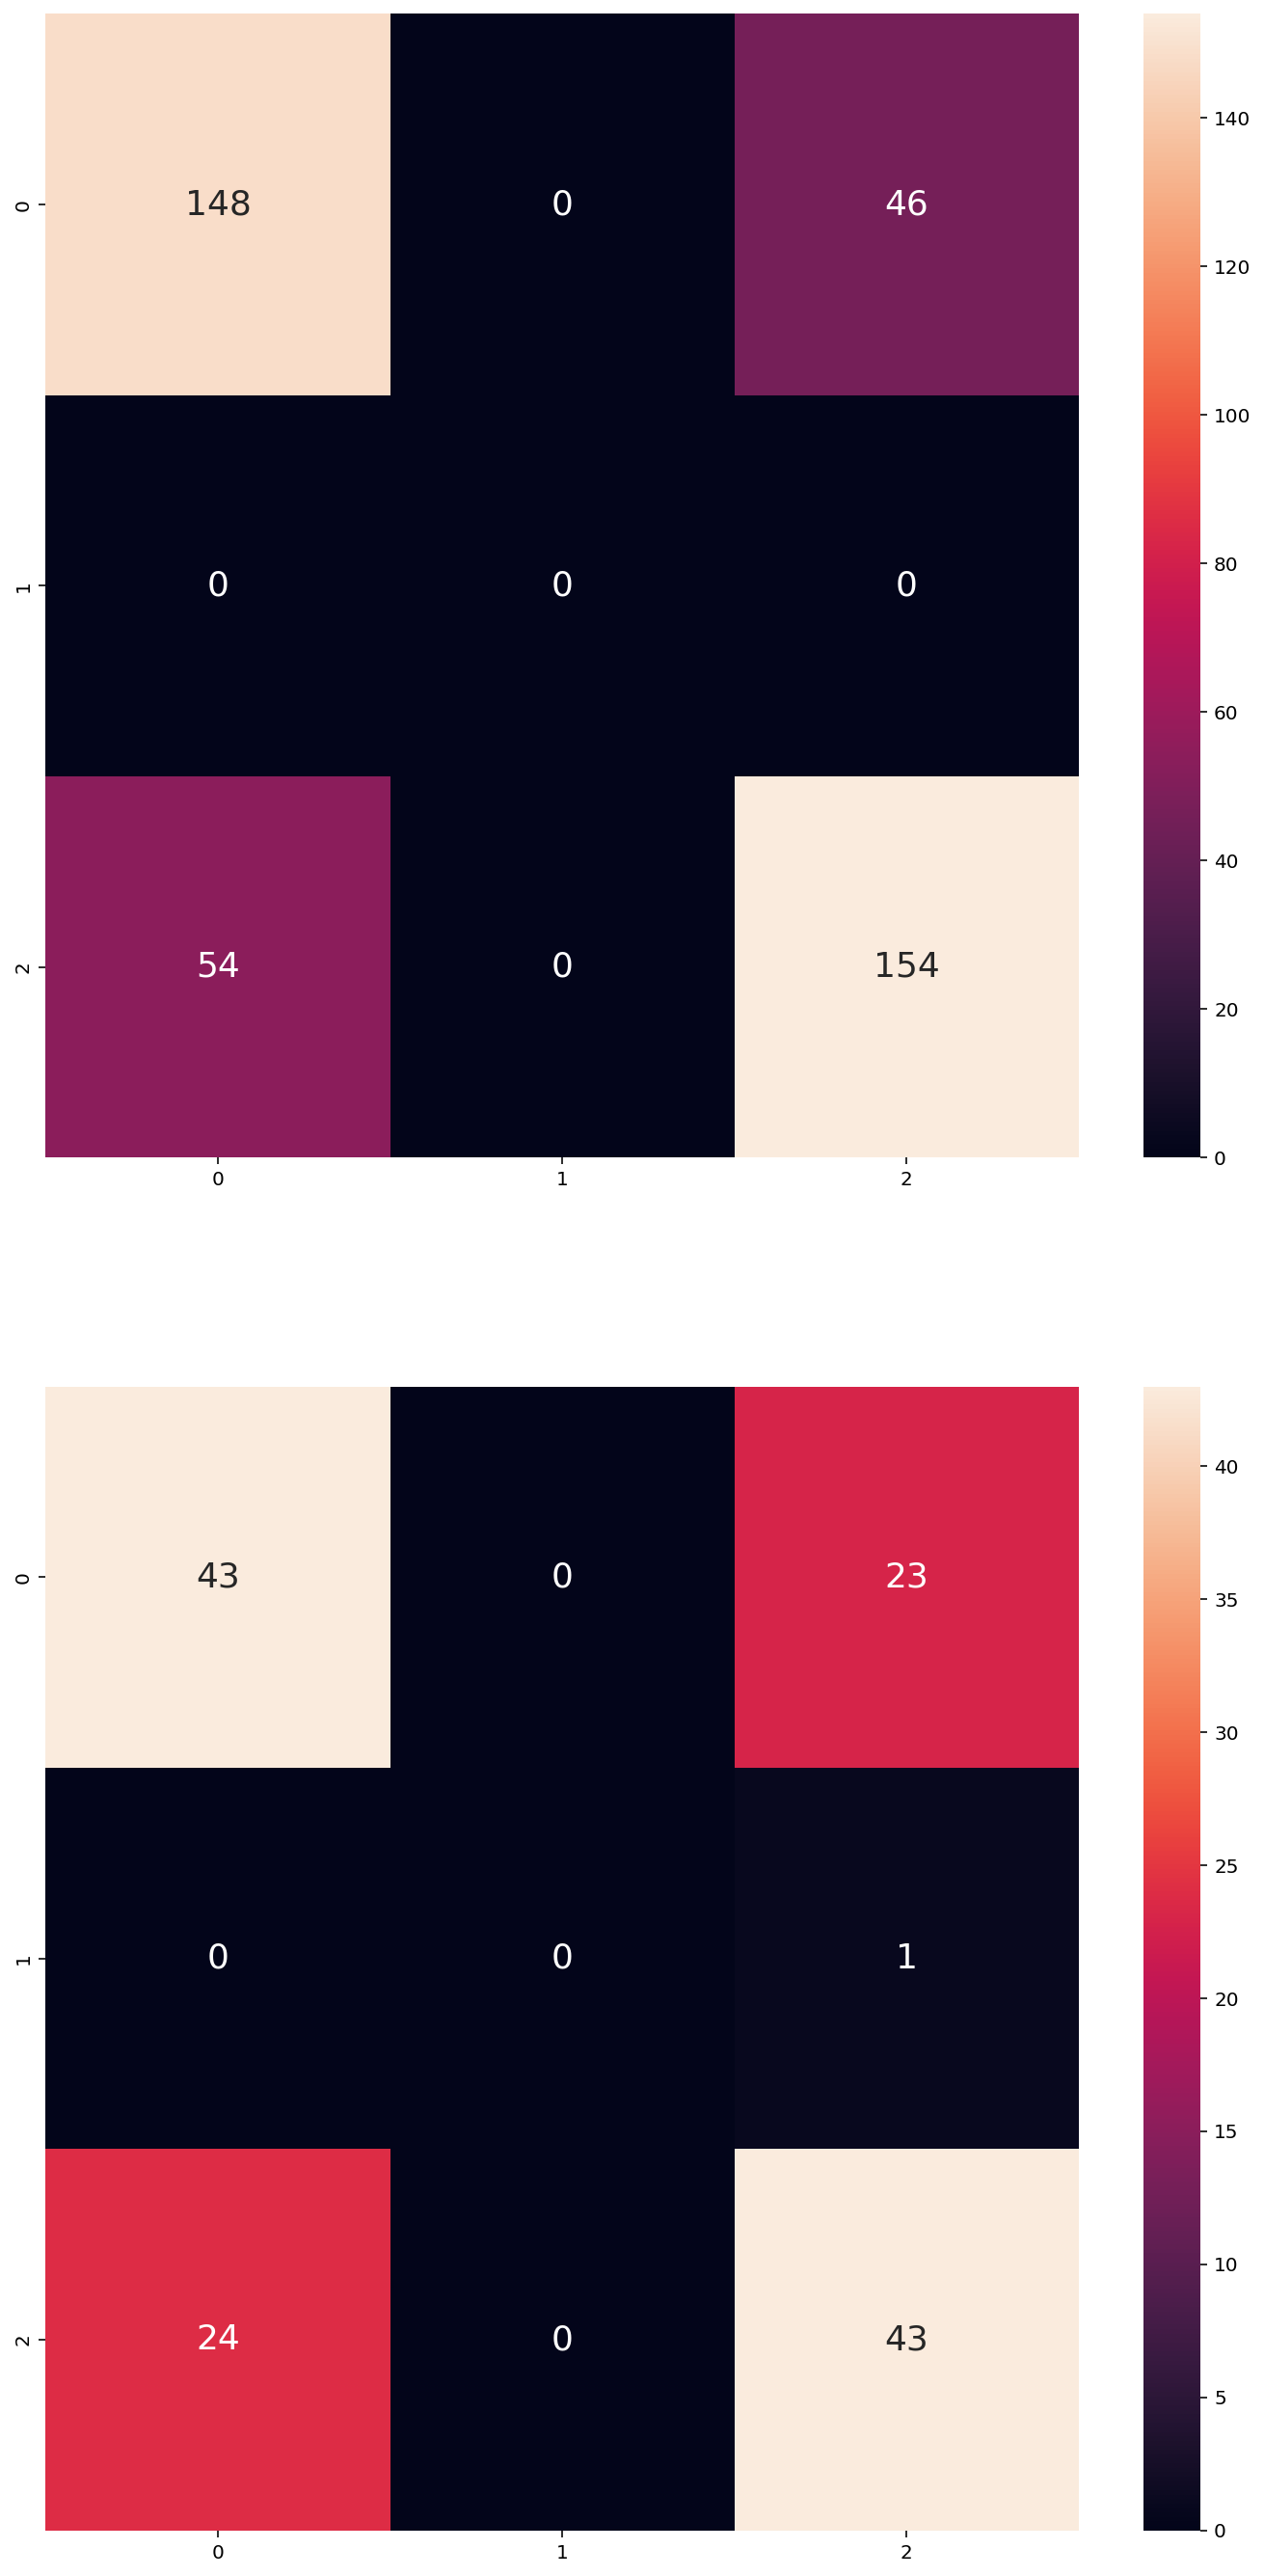

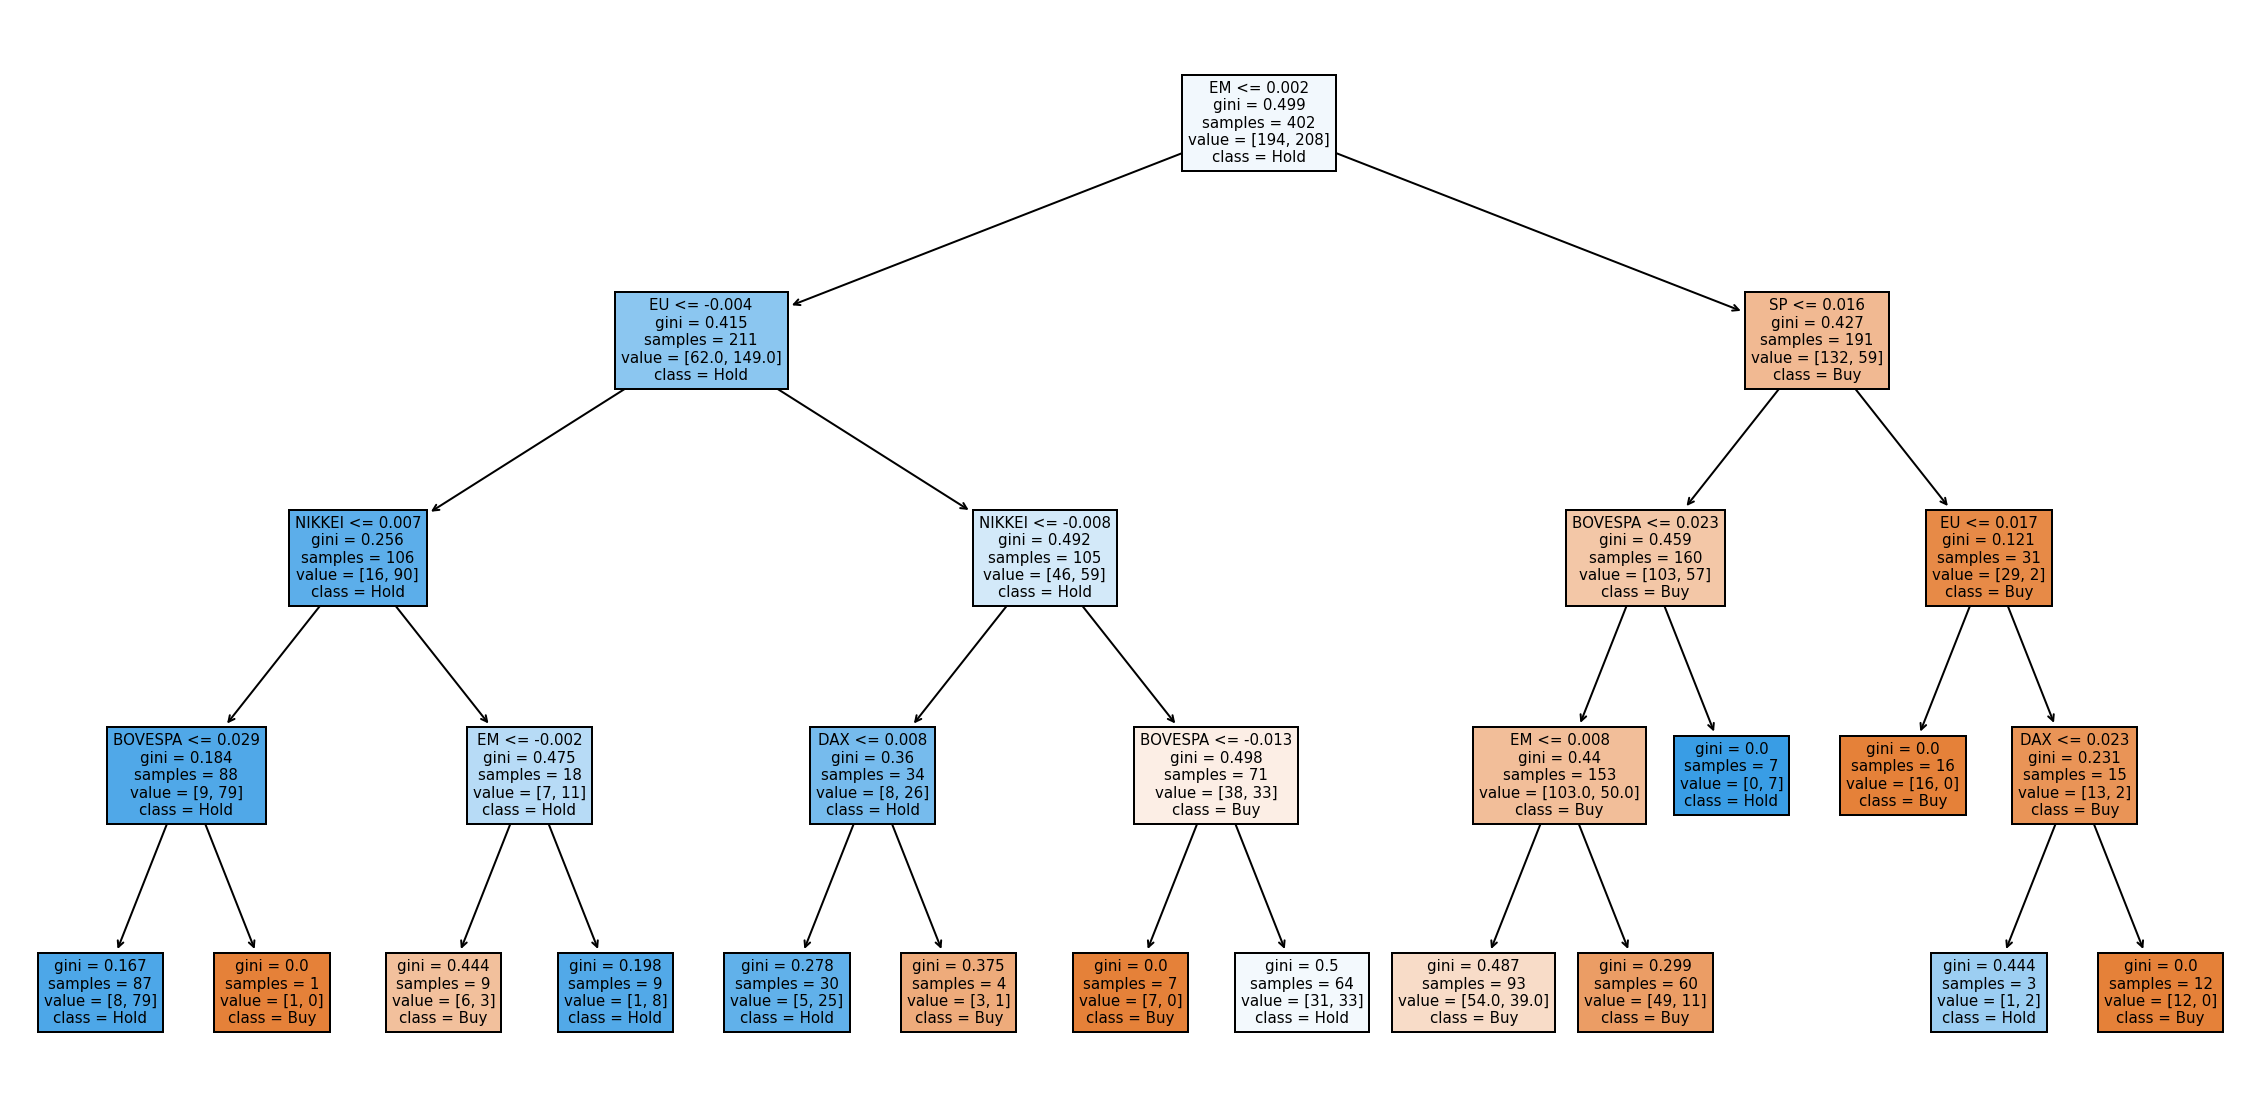

In [29]:
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np  # Import NumPy


# Assuming your dataset is named 'cleanData' and 'predictors' are the features to be used
predictors = ["EU", "EM", "FTSE", "NIKKEI", "DAX", "SP", "BOVESPA"]

# Extract Response and Predictors
X = cleanData[predictors]
y = cleanData['Buy/Hold/Sell']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the Dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=4, random_state=42)  # create the decision tree object
dectree.fit(X_train, y_train)  # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))

# Determine the number of classes
num_classes = len(label_encoder.classes_)

# Calculate the confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred, labels=range(num_classes))
conf_matrix_test = confusion_matrix(y_test, y_test_pred, labels=range(num_classes))

# Plot confusion matrices
sb.heatmap(conf_matrix_train, annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(conf_matrix_test, annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dectree, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()


Improved Logistic Reg Model (Removing outliers)

Intercept : 0.07204179635242573
EU : -0.9433514937374502
EM : -0.7554415046951465
FTSE : -0.8705295428696376
NIKKEI : -0.908020119777165
DAX : -0.9238090391239709
SP : -0.712940882089748
BOVESPA : -0.6838514523013457


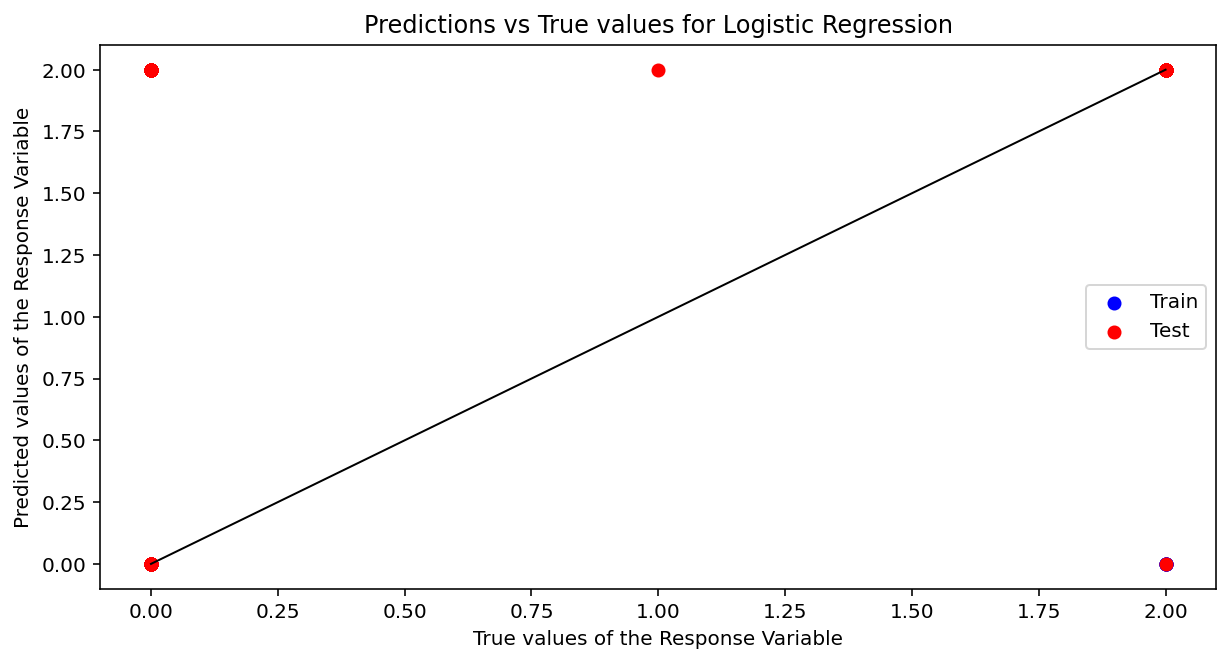

Train Accuracy: 0.5895522388059702
Test Accuracy: 0.5970149253731343

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.87      0.18      0.29       194
           2       0.56      0.98      0.71       208

    accuracy                           0.59       402
   macro avg       0.72      0.58      0.50       402
weighted avg       0.71      0.59      0.51       402

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      0.21      0.35        66
           1       0.00      0.00      0.00         1
           2       0.55      0.99      0.71        67

    accuracy                           0.60       134
   macro avg       0.50      0.40      0.35       134
weighted avg       0.74      0.60      0.53       134



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipykernel_227/1665619532.py:63: RuntimeWarning: invalid value encountered in long_scalars
  tpr_test = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[1, 0])


True Positive Rate (TPR) Train: 0.9759615384615384
False Positive Rate (FPR) Train: 0.8247422680412371

True Positive Rate (TPR) Test: nan
False Positive Rate (FPR) Test: 0.0


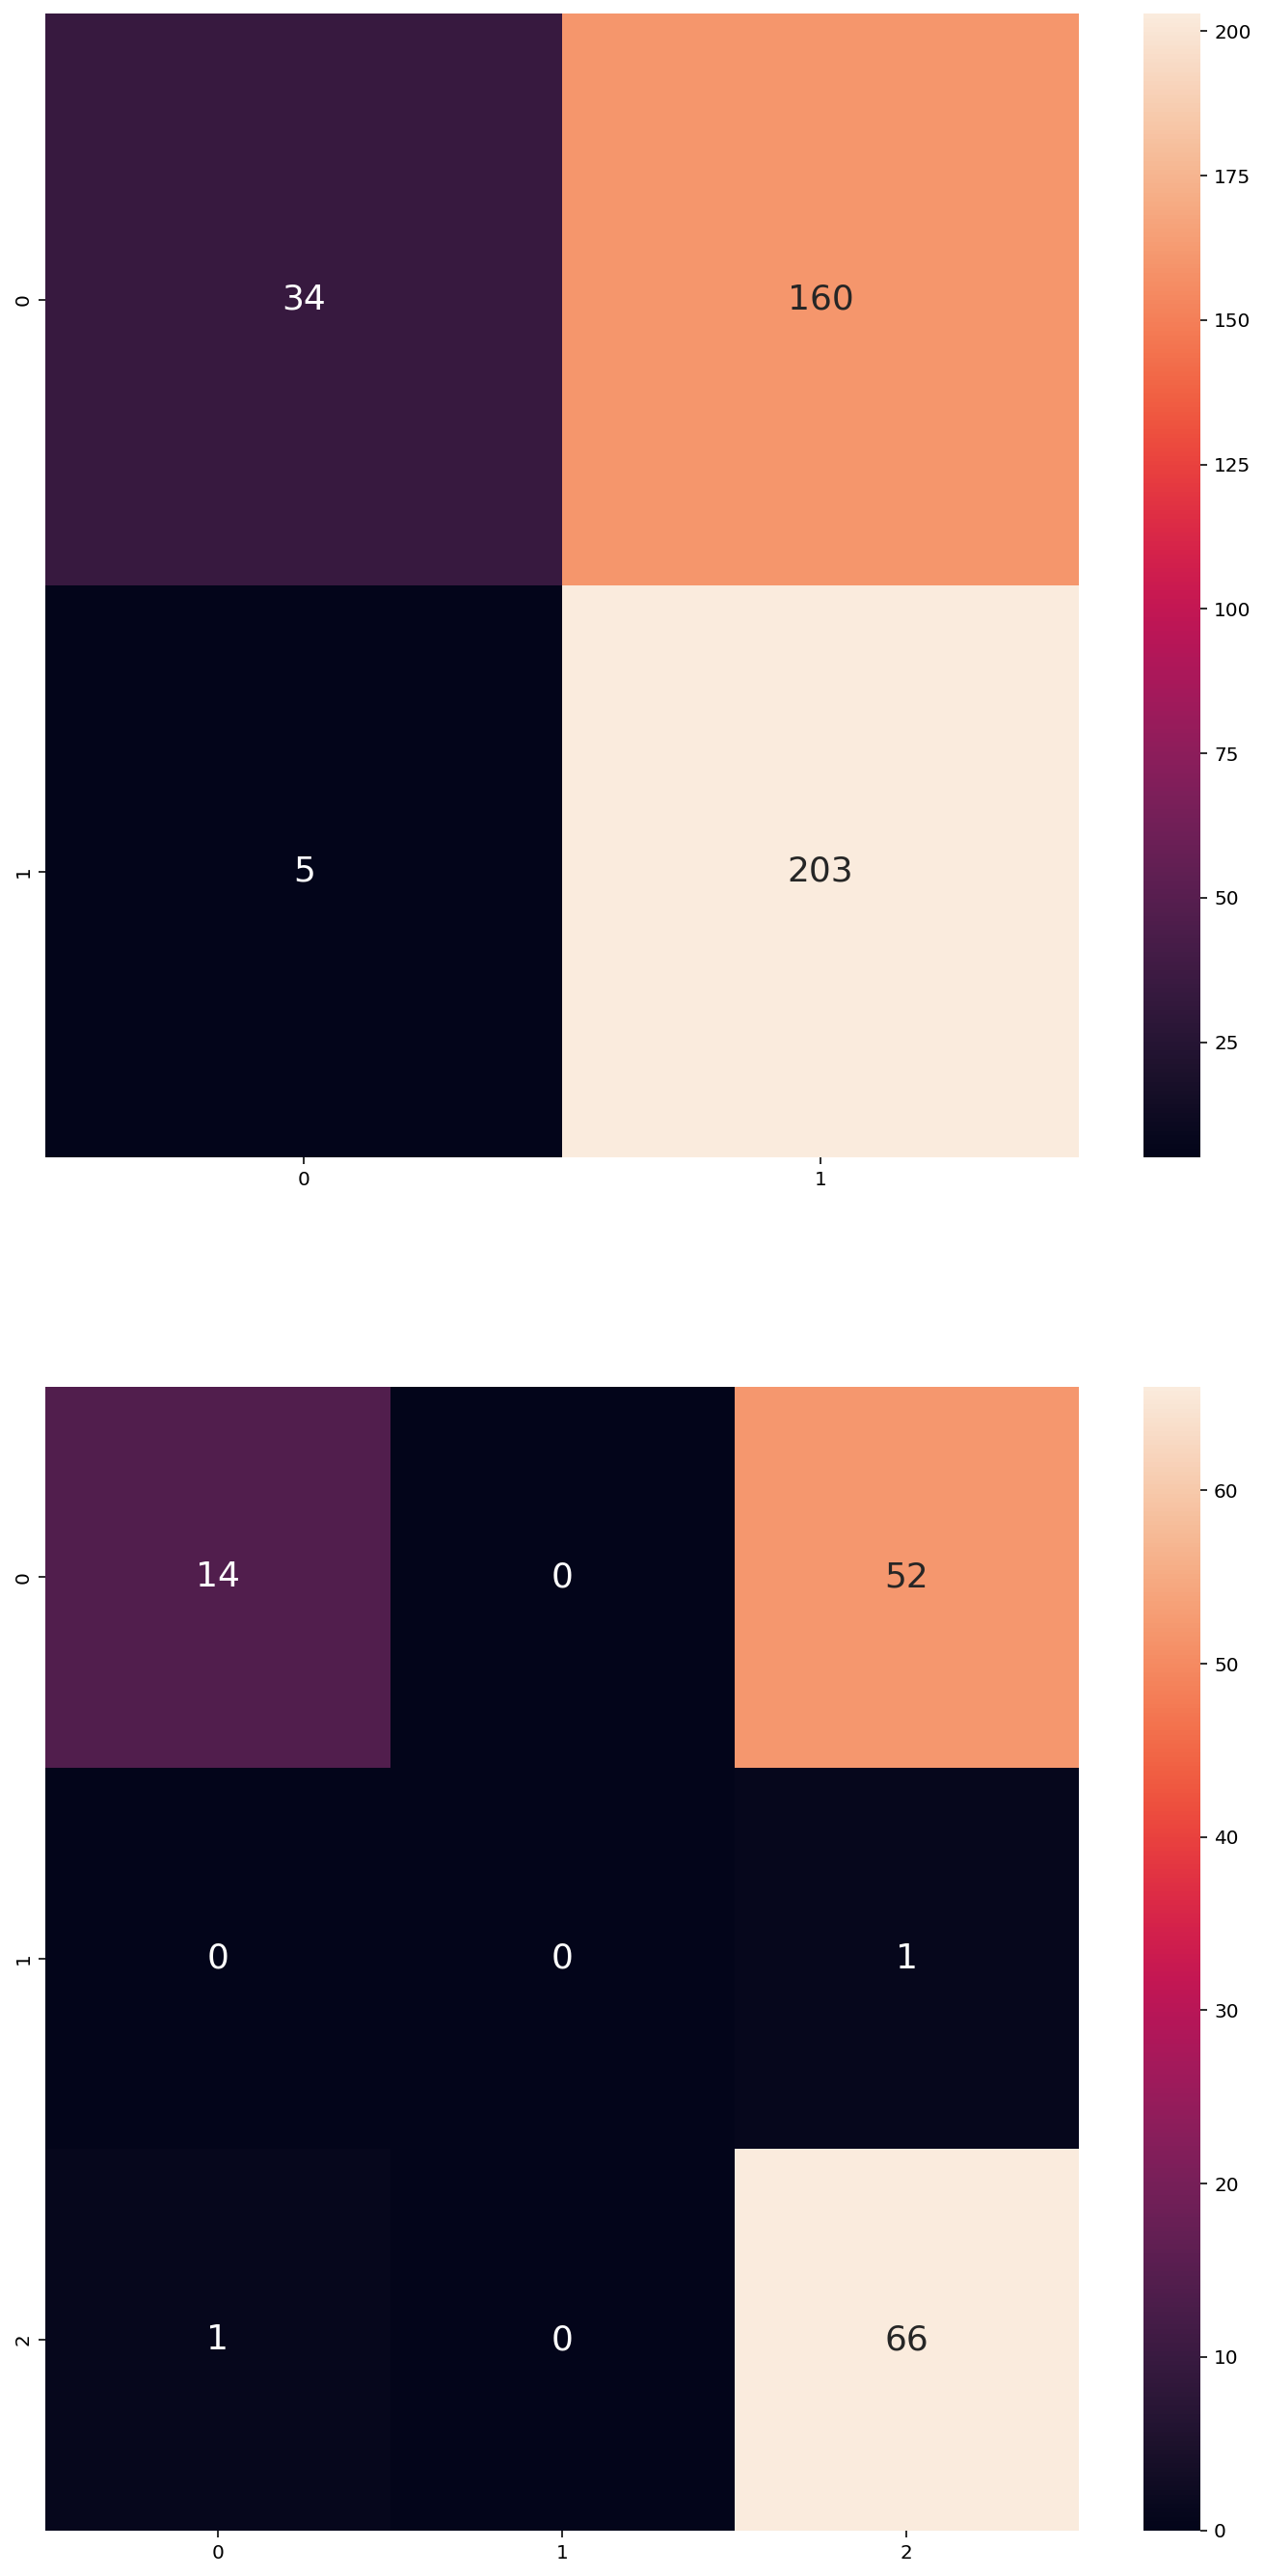

In [20]:
# Assuming 'cleanData' is your DataFrame and 'predictors' are the features to be used
predictors = ['EU', 'EM', 'FTSE', 'NIKKEI', 'DAX', 'SP', 'BOVESPA']

# Encode the 'Buy/Hold/Sell' column into binary labels (0 for 'Sell', 1 for 'Buy')
label_encoder = LabelEncoder()
cleanData['Buy/Hold/Sell_encoded'] = label_encoder.fit_transform(cleanData['Buy/Hold/Sell'])

# Select the encoded target variable and predictors
X = cleanData[predictors]
y = cleanData['Buy/Hold/Sell_encoded']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get the coefficients with their respective predictor names
coefficients_with_names = zip(['Intercept'] + predictors, [logreg.intercept_[0]] + list(logreg.coef_[0]))

# Print coefficients with names
for predictor, coefficient in coefficients_with_names:
    print(predictor, ":", coefficient)

# Predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Plotting Predictions vs True values
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         color='black', linestyle='-', linewidth=1)  # Diagonal line
plt.xlabel("True values of the Response Variable")
plt.ylabel("Predicted values of the Response Variable")
plt.title("Predictions vs True values for Logistic Regression")
plt.legend()
plt.show()

# Model Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
            annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

# Calculate True Positive Rate and False Positive Rate
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

tpr_train = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[1, 0])
fpr_train = conf_matrix_train[0, 1] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])

tpr_test = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[1, 0])
fpr_test = conf_matrix_test[0, 1] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])

print("True Positive Rate (TPR) Train:", tpr_train)
print("False Positive Rate (FPR) Train:", fpr_train)
print()
print("True Positive Rate (TPR) Test:", tpr_test)
print("False Positive Rate (FPR) Test:", fpr_test)


Intercept : 0.07204179635242573
EU : -0.9433514937374502
EM : -0.7554415046951465
FTSE : -0.8705295428696376
NIKKEI : -0.908020119777165
DAX : -0.9238090391239709
SP : -0.712940882089748
BOVESPA : -0.6838514523013457


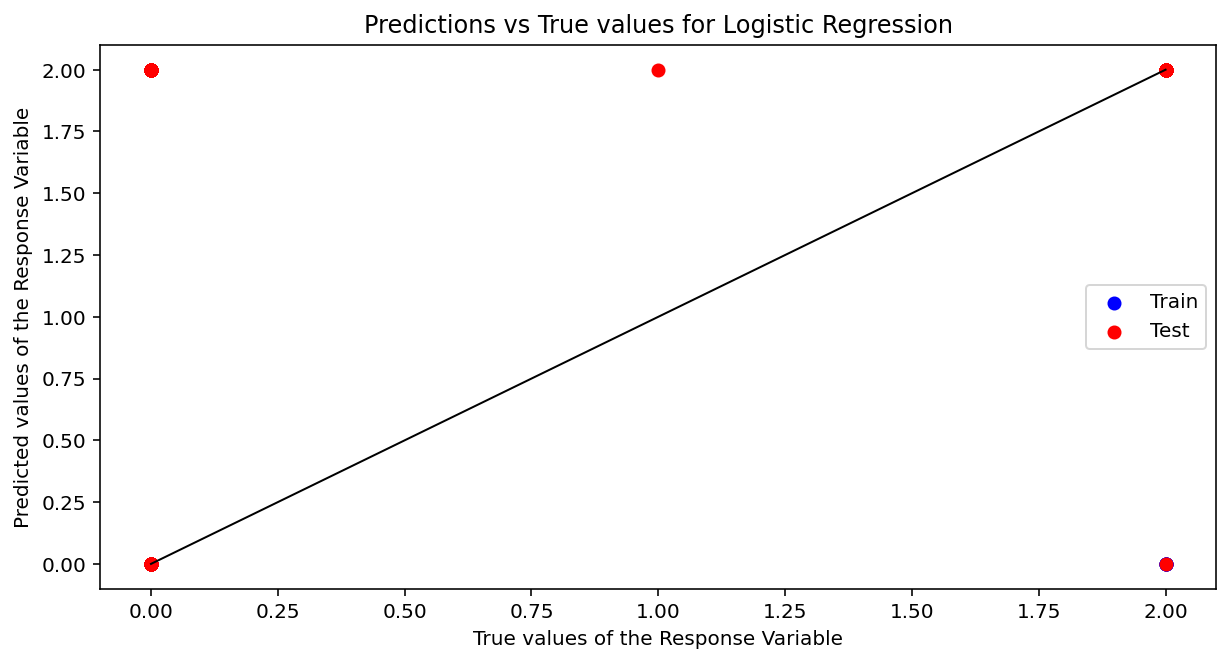

Train Accuracy: 0.5895522388059702
Test Accuracy: 0.5970149253731343

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.87      0.18      0.29       194
           2       0.56      0.98      0.71       208

    accuracy                           0.59       402
   macro avg       0.72      0.58      0.50       402
weighted avg       0.71      0.59      0.51       402

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      0.21      0.35        66
           1       0.00      0.00      0.00         1
           2       0.55      0.99      0.71        67

    accuracy                           0.60       134
   macro avg       0.50      0.40      0.35       134
weighted avg       0.74      0.60      0.53       134



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipykernel_227/1665619532.py:63: RuntimeWarning: invalid value encountered in long_scalars
  tpr_test = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[1, 0])


True Positive Rate (TPR) Train: 0.9759615384615384
False Positive Rate (FPR) Train: 0.8247422680412371

True Positive Rate (TPR) Test: nan
False Positive Rate (FPR) Test: 0.0


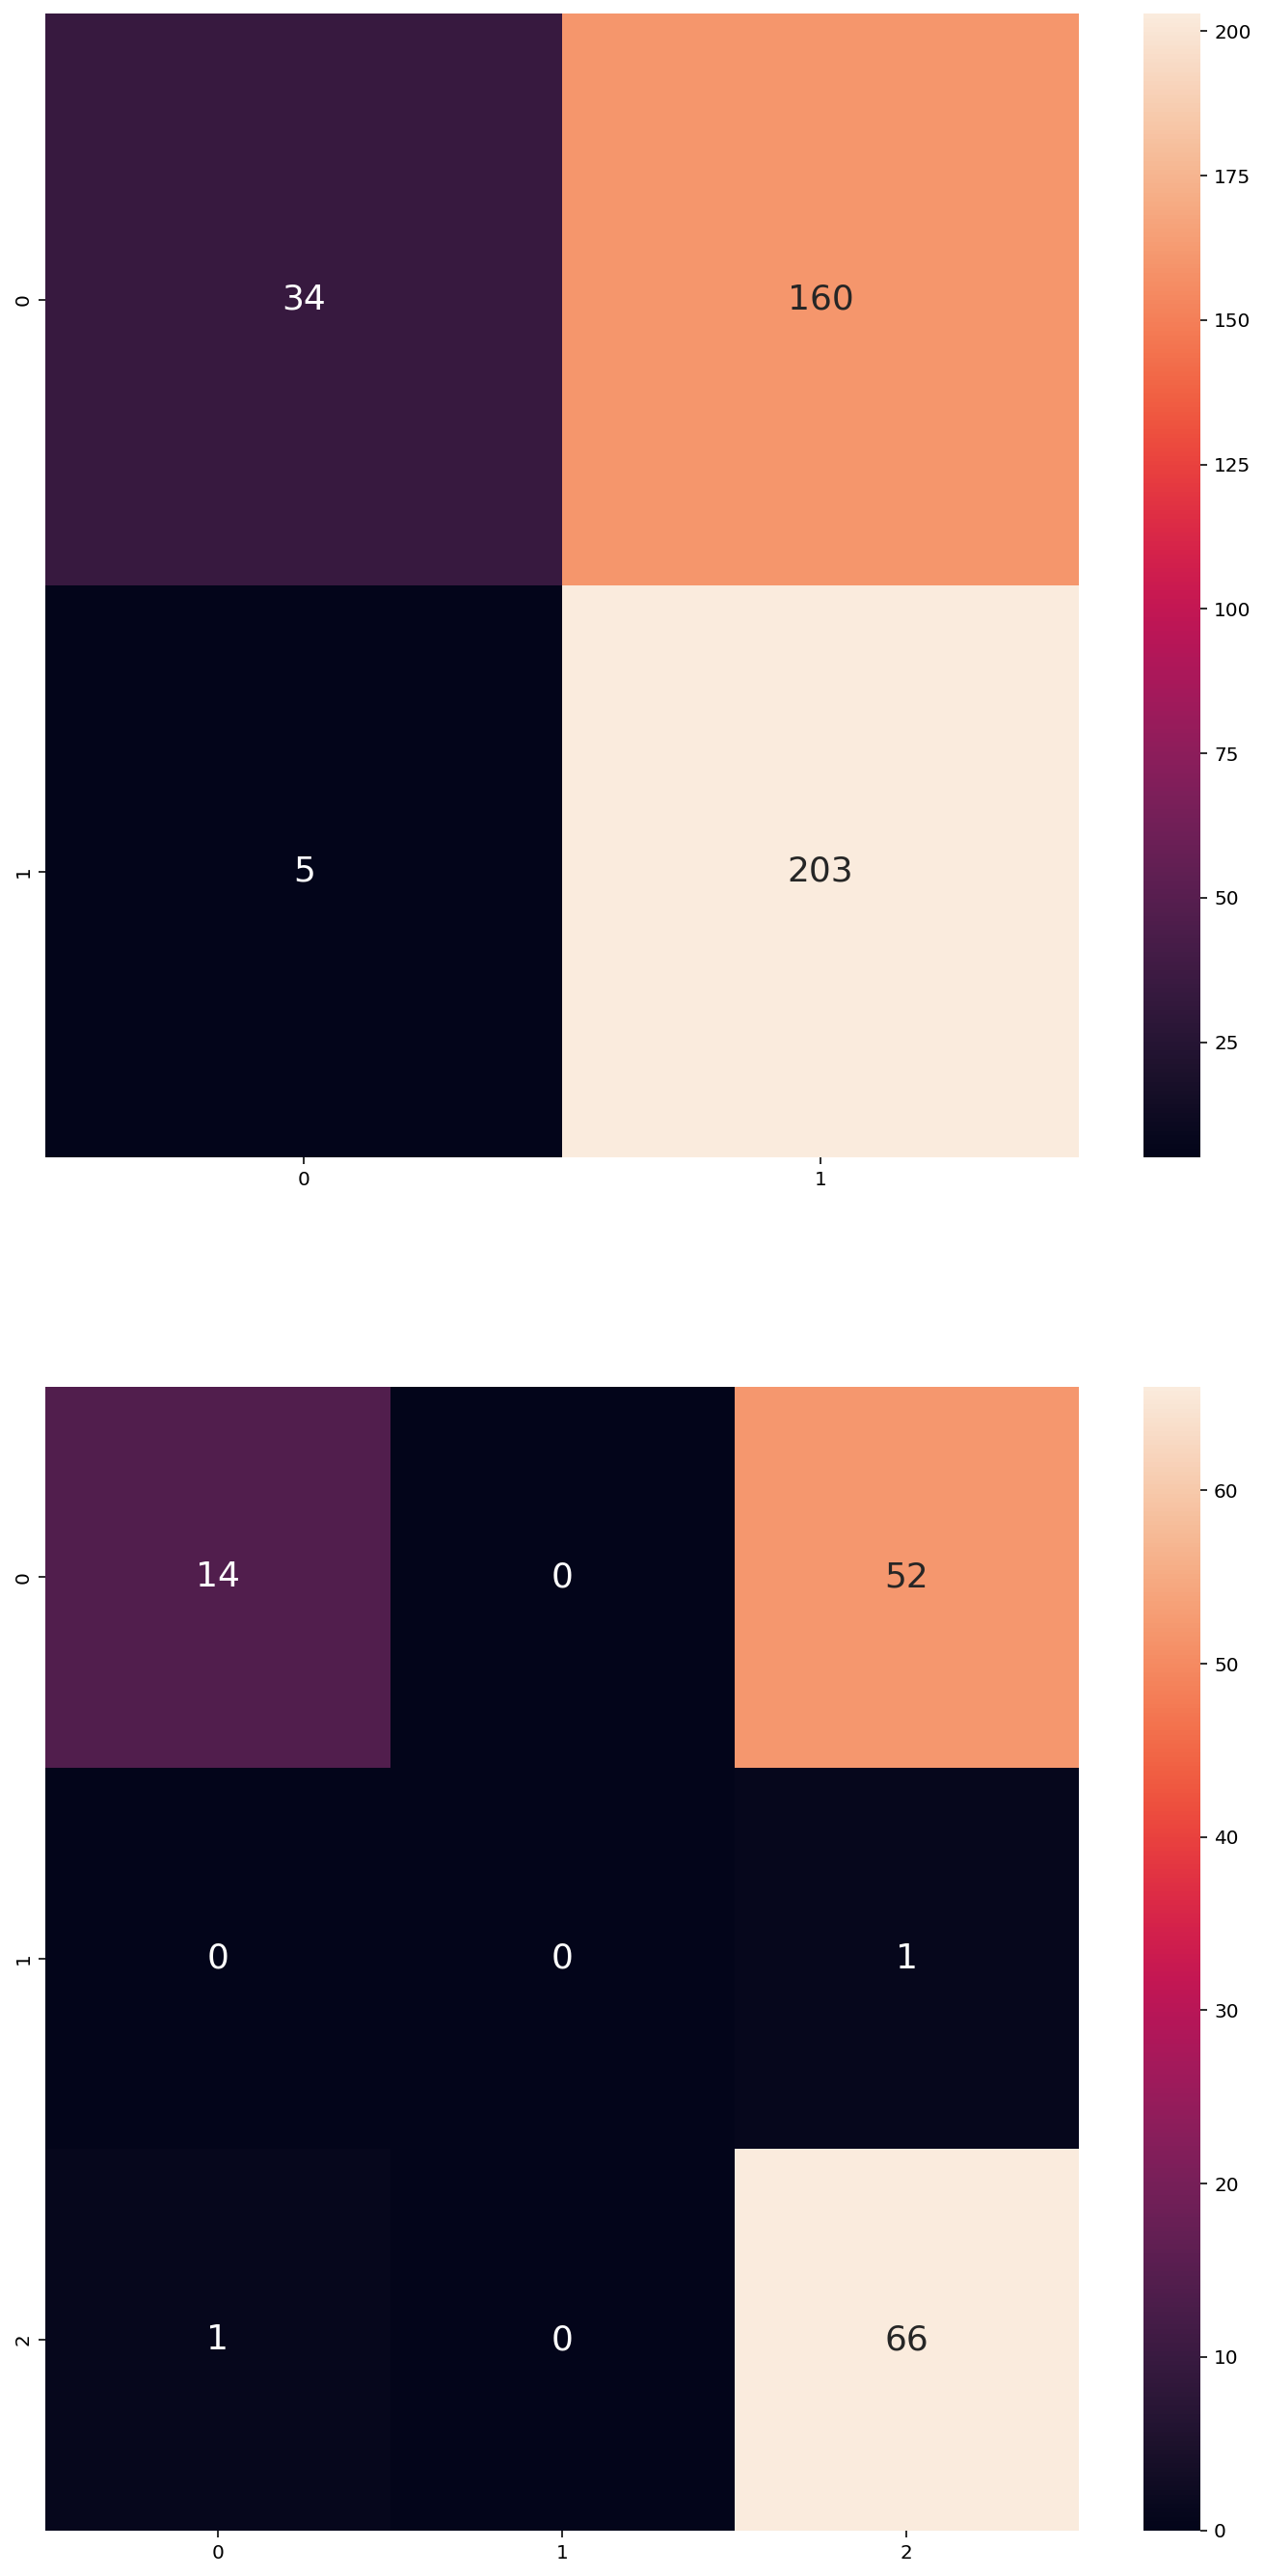